In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
A_RRP = np.load('Simul/RR_RP.npz',allow_pickle=True)

In [ ]:
KK,MM = np.meshgrid(A_RRP['Ks'],A_RRP['ms'])

In [154]:
N = 5000
df_new = pd.read_excel(f'N = {N} seed = 10 QNORMAL w pv.xlsm',index_col=[0,1])
NRP = df_new['r+'].unstack().to_numpy(float).T
NR = df_new['rm'].unstack().to_numpy(float).T
NRPT = df_new['r+_total'].unstack().to_numpy(float).T
NR0 = df_new['r0'].unstack().to_numpy(float).T
NRM = df_new['r-'].unstack().to_numpy(float).T
NRMT = df_new['r-_total'].unstack().to_numpy(float).T
NSIG_S = df_new['sig'].unstack().to_numpy(float).T

In [178]:
# sigma2 =
R,R0,RP,RPl = A_RRP['R'],A_RRP['R0'],A_RRP['RP'],A_RRP['RPl']
RD = R0 - R

In [75]:
a = 1/np.sqrt(KK*R*MM)
b = 4/np.pi * a - 0.3056*a**3
b = np.where(np.where(a>1.193,1,b)>=1,1,b)

OPS = b*KK*R

C:\Users\kim9y\AppData\Local\Temp\ipykernel_38252\1498381093.py:1: RuntimeWarning: divide by zero encountered in divide
  a = 1/np.sqrt(KK*R*MM)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_38252\1498381093.py:2: RuntimeWarning: invalid value encountered in subtract
  b = 4/np.pi * a - 0.3056*a**3


In [228]:
RP_T = np.nanmax((RP,RD/2),axis=(0,1))
R_TM = R0 - MM*KK*R0*RP/(MM**2*OPS**2 + 1)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_38252\3126430851.py:1: RuntimeWarning: All-NaN axis encountered
  RP_T = np.nanmax((RP,RD/2),axis=(0,1))


In [77]:
sig_r = 2*RP*np.sqrt(1/2 - MM*KK*R0/(4*(4*MM**2*OPS**2 + 1)) - (MM*KK*R0/(2*(MM**2*OPS**2 + 1)))**2)

In [ ]:
,ms = ms,Kcs = Kcs,K_mins = K_mins

In [249]:
R_KC = np.load('Simul/R_Kc.npz',allow_pickle=True)
K_cs = R_KC['Kcs']
m_Kc = R_KC['ms']
K_mins = R_KC['K_mins']

In [304]:
def nan_corrcoef(a,b):
    a = a.flatten()
    b = b.flatten()
    nan_idx1 = np.isnan(a)
    nan_idx2 = np.isnan(b)
    nan_idx = nan_idx1 | nan_idx2
    a = a[~nan_idx]
    b = b[~nan_idx]
    return np.corrcoef(a,b)[0,1]


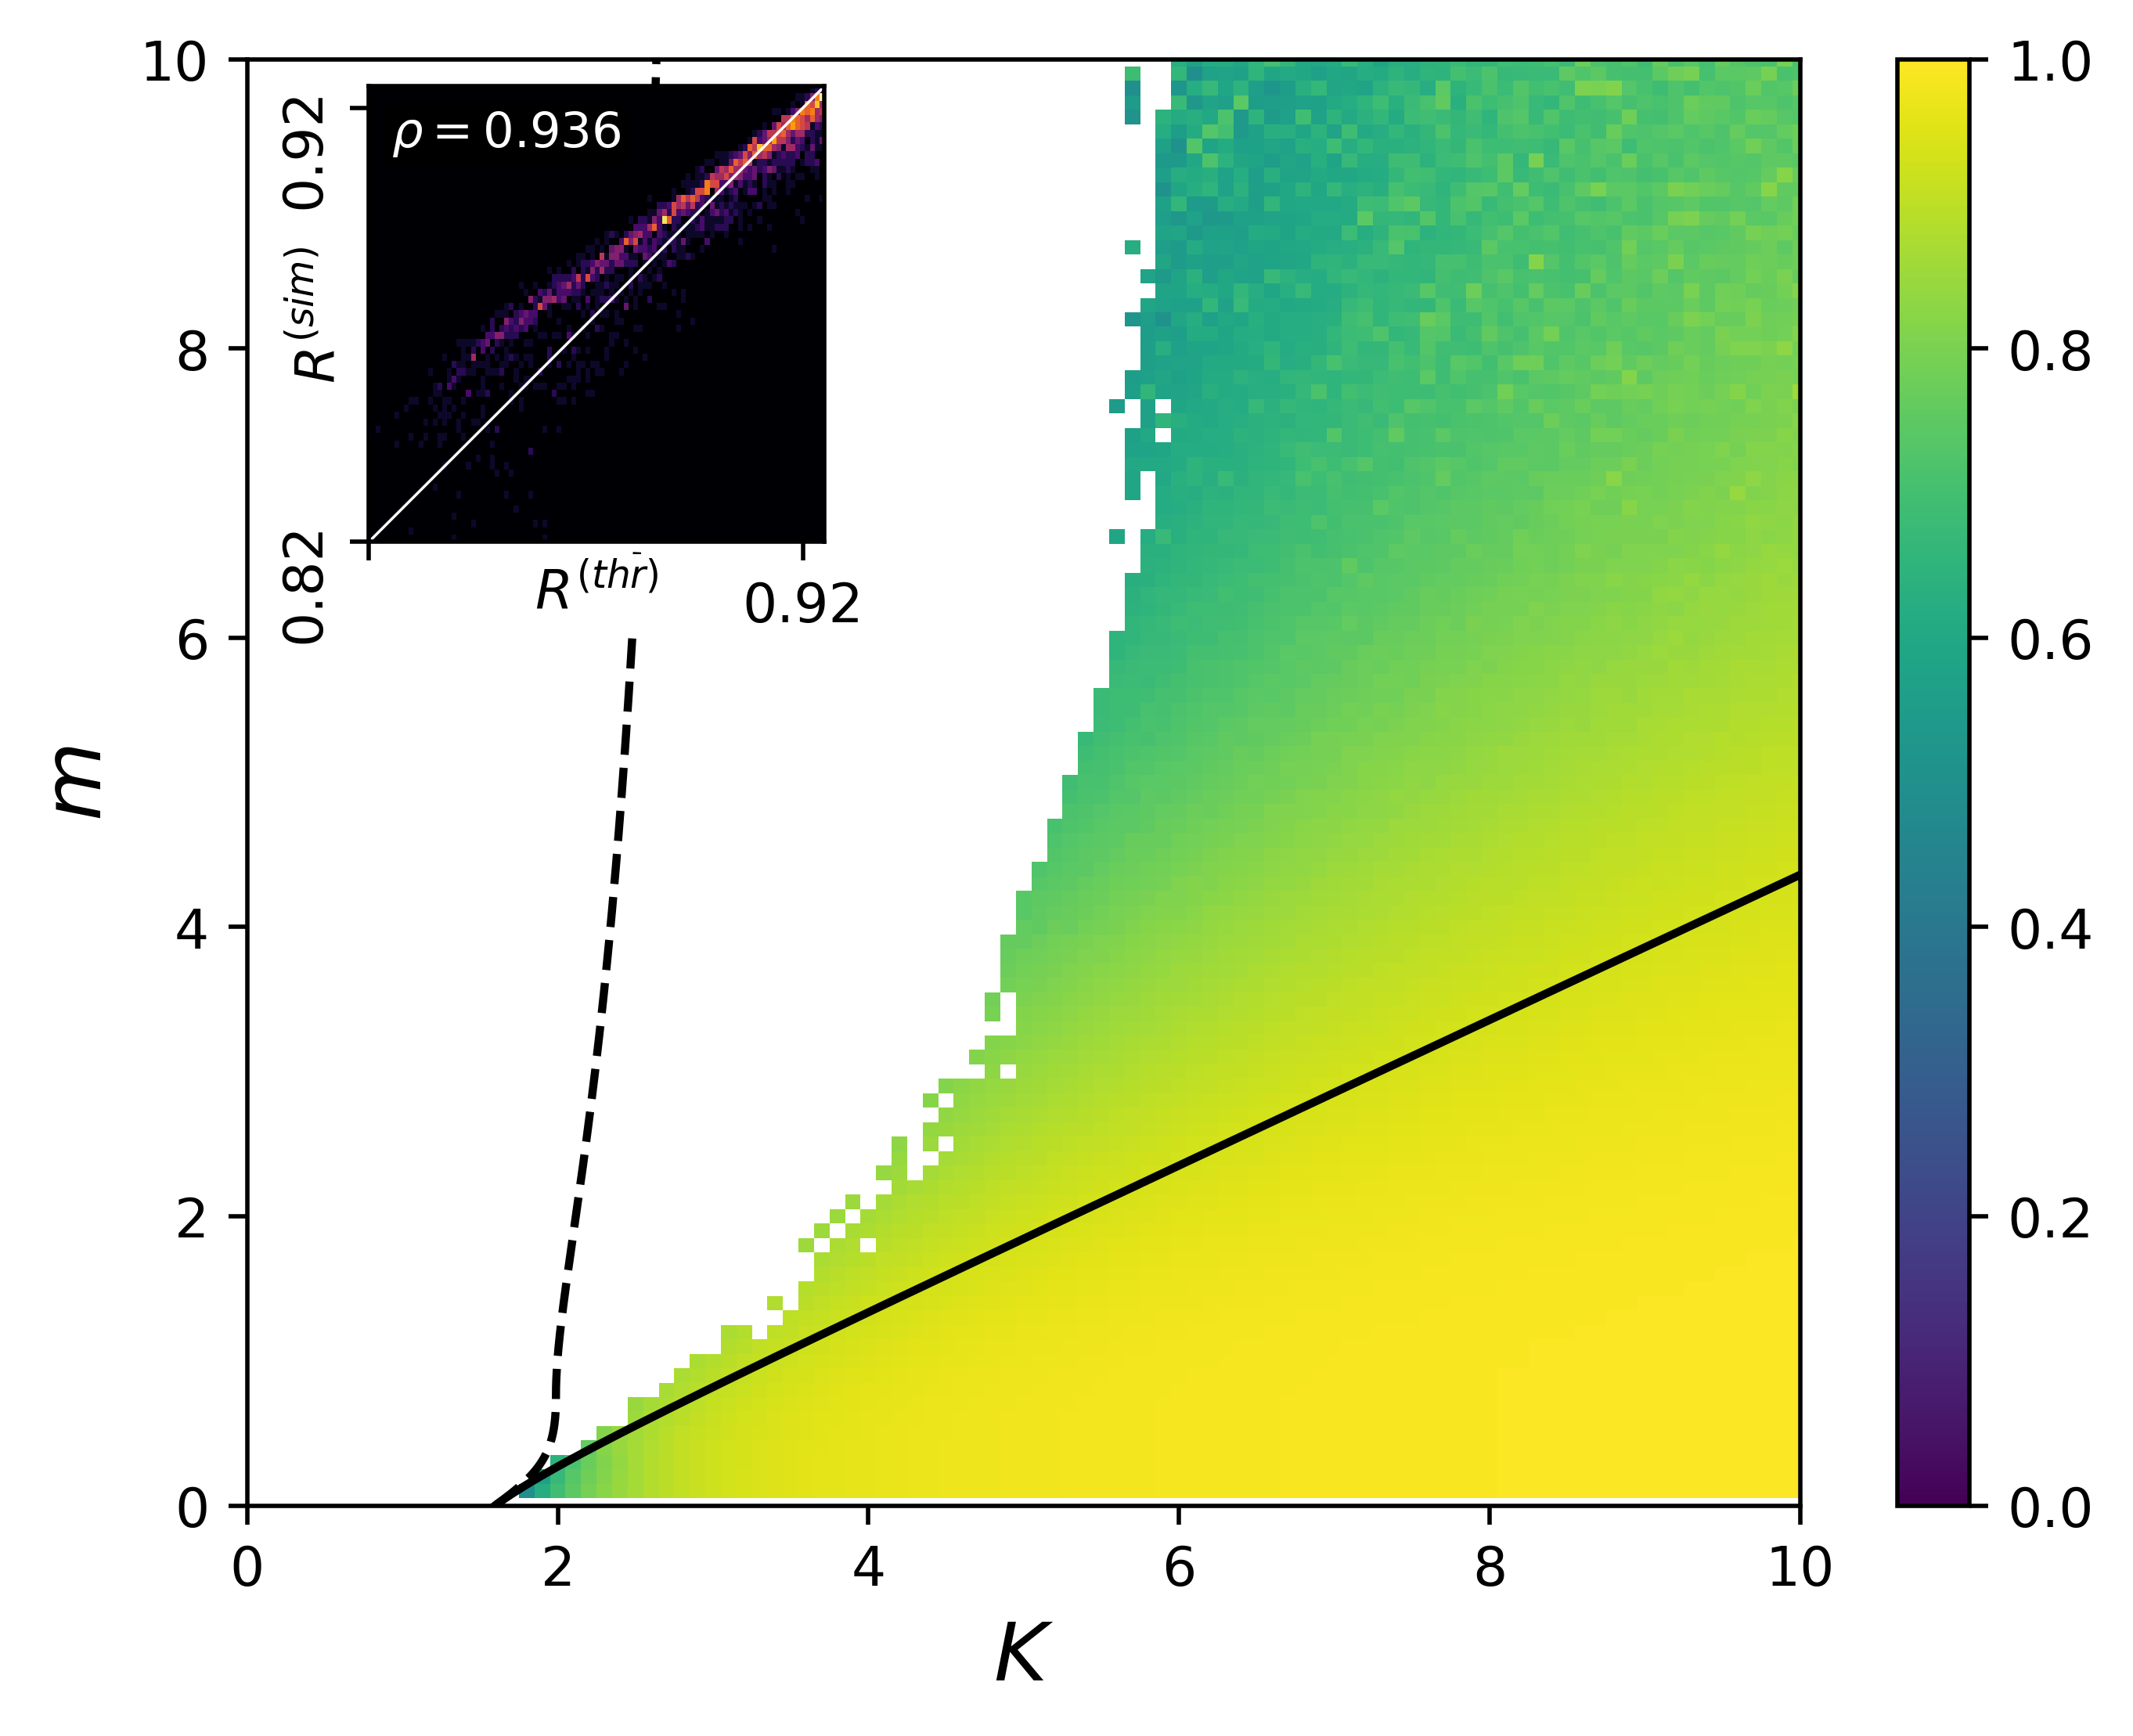

In [308]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- 메인 큰 그림 ---
fig, ax = plt.subplots(dpi=500)
pcm = ax.pcolormesh(KK, MM, NR0, vmin=0, vmax=1)
ax.plot(K_cs, m_Kc, 'k-')
ax.plot(K_mins, m_Kc, 'k--')
fig.colorbar(pcm, ax=ax)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel('$K$', fontsize=15)
ax.set_ylabel('$m$', fontsize=15)

# --- hist2d inset ---
axins = inset_axes(ax, width="35%", height="35%", bbox_to_anchor=(-0.5, 0.1, 0.9, 0.9),bbox_transform=ax.transAxes)

valid_indices = ~np.isnan(Rthr) & ~np.isnan(Rsim)
filtered_A_RPU = Rthr[valid_indices]
filtered_RP = Rsim[valid_indices]

# 2D 히스토그램
axins.hist2d(filtered_A_RPU, filtered_RP, bins=100, cmap='inferno')

pcc = nan_corrcoef(Rthr,Rsim)
# 대각선
lims = (0.82, 0.925)
axins.plot([lims[0], lims[1]], [lims[0], lims[1]], lw=0.5, c='w')

axins.set_aspect('equal', adjustable='box')
axins.set_xlim(*lims)
axins.set_ylim(*lims)
xl =axins.set_xlabel('$R^{(thr)}$', fontsize=10)
xl.set_bbox(dict(facecolor='white', edgecolor='none', pad=2.0))
axins.set_ylabel('$R^{(sim)}$', fontsize=10)
axins.xaxis.set_label_coords(0.5, -0.05, transform=axins.transAxes)

pcc = nan_corrcoef(Rthr, Rsim)

# inset 안에 텍스트 추가
axins.text(
    0.05, 0.95,                       # inset 좌표계 기준 위치 (왼쪽 위 근처)
    fr"$\rho = {pcc:.3f}$",                 # 표시할 내용
    transform=axins.transAxes,        # inset 축 좌표계(0~1) 사용
    fontsize=9, color="white",        # 글자 크기, 색
    ha="left", va="top",              # 정렬 (왼쪽 위 기준)
    bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=1.0)  # 배경박스
)


# y라벨을 yticks 쪽에 더 붙임 (기본보다 왼쪽으로 이동)
axins.yaxis.set_label_coords(-0.05, 0.5, transform=axins.transAxes)
axins.set_yticks([0.82,0.92],[0.82,0.92])
axins.set_xticks([0.82,0.92],["",0.92])
# ytick 회전
axins.tick_params(axis='y', rotation=90)

plt.show()


Text(0, 0.5, '$m$')

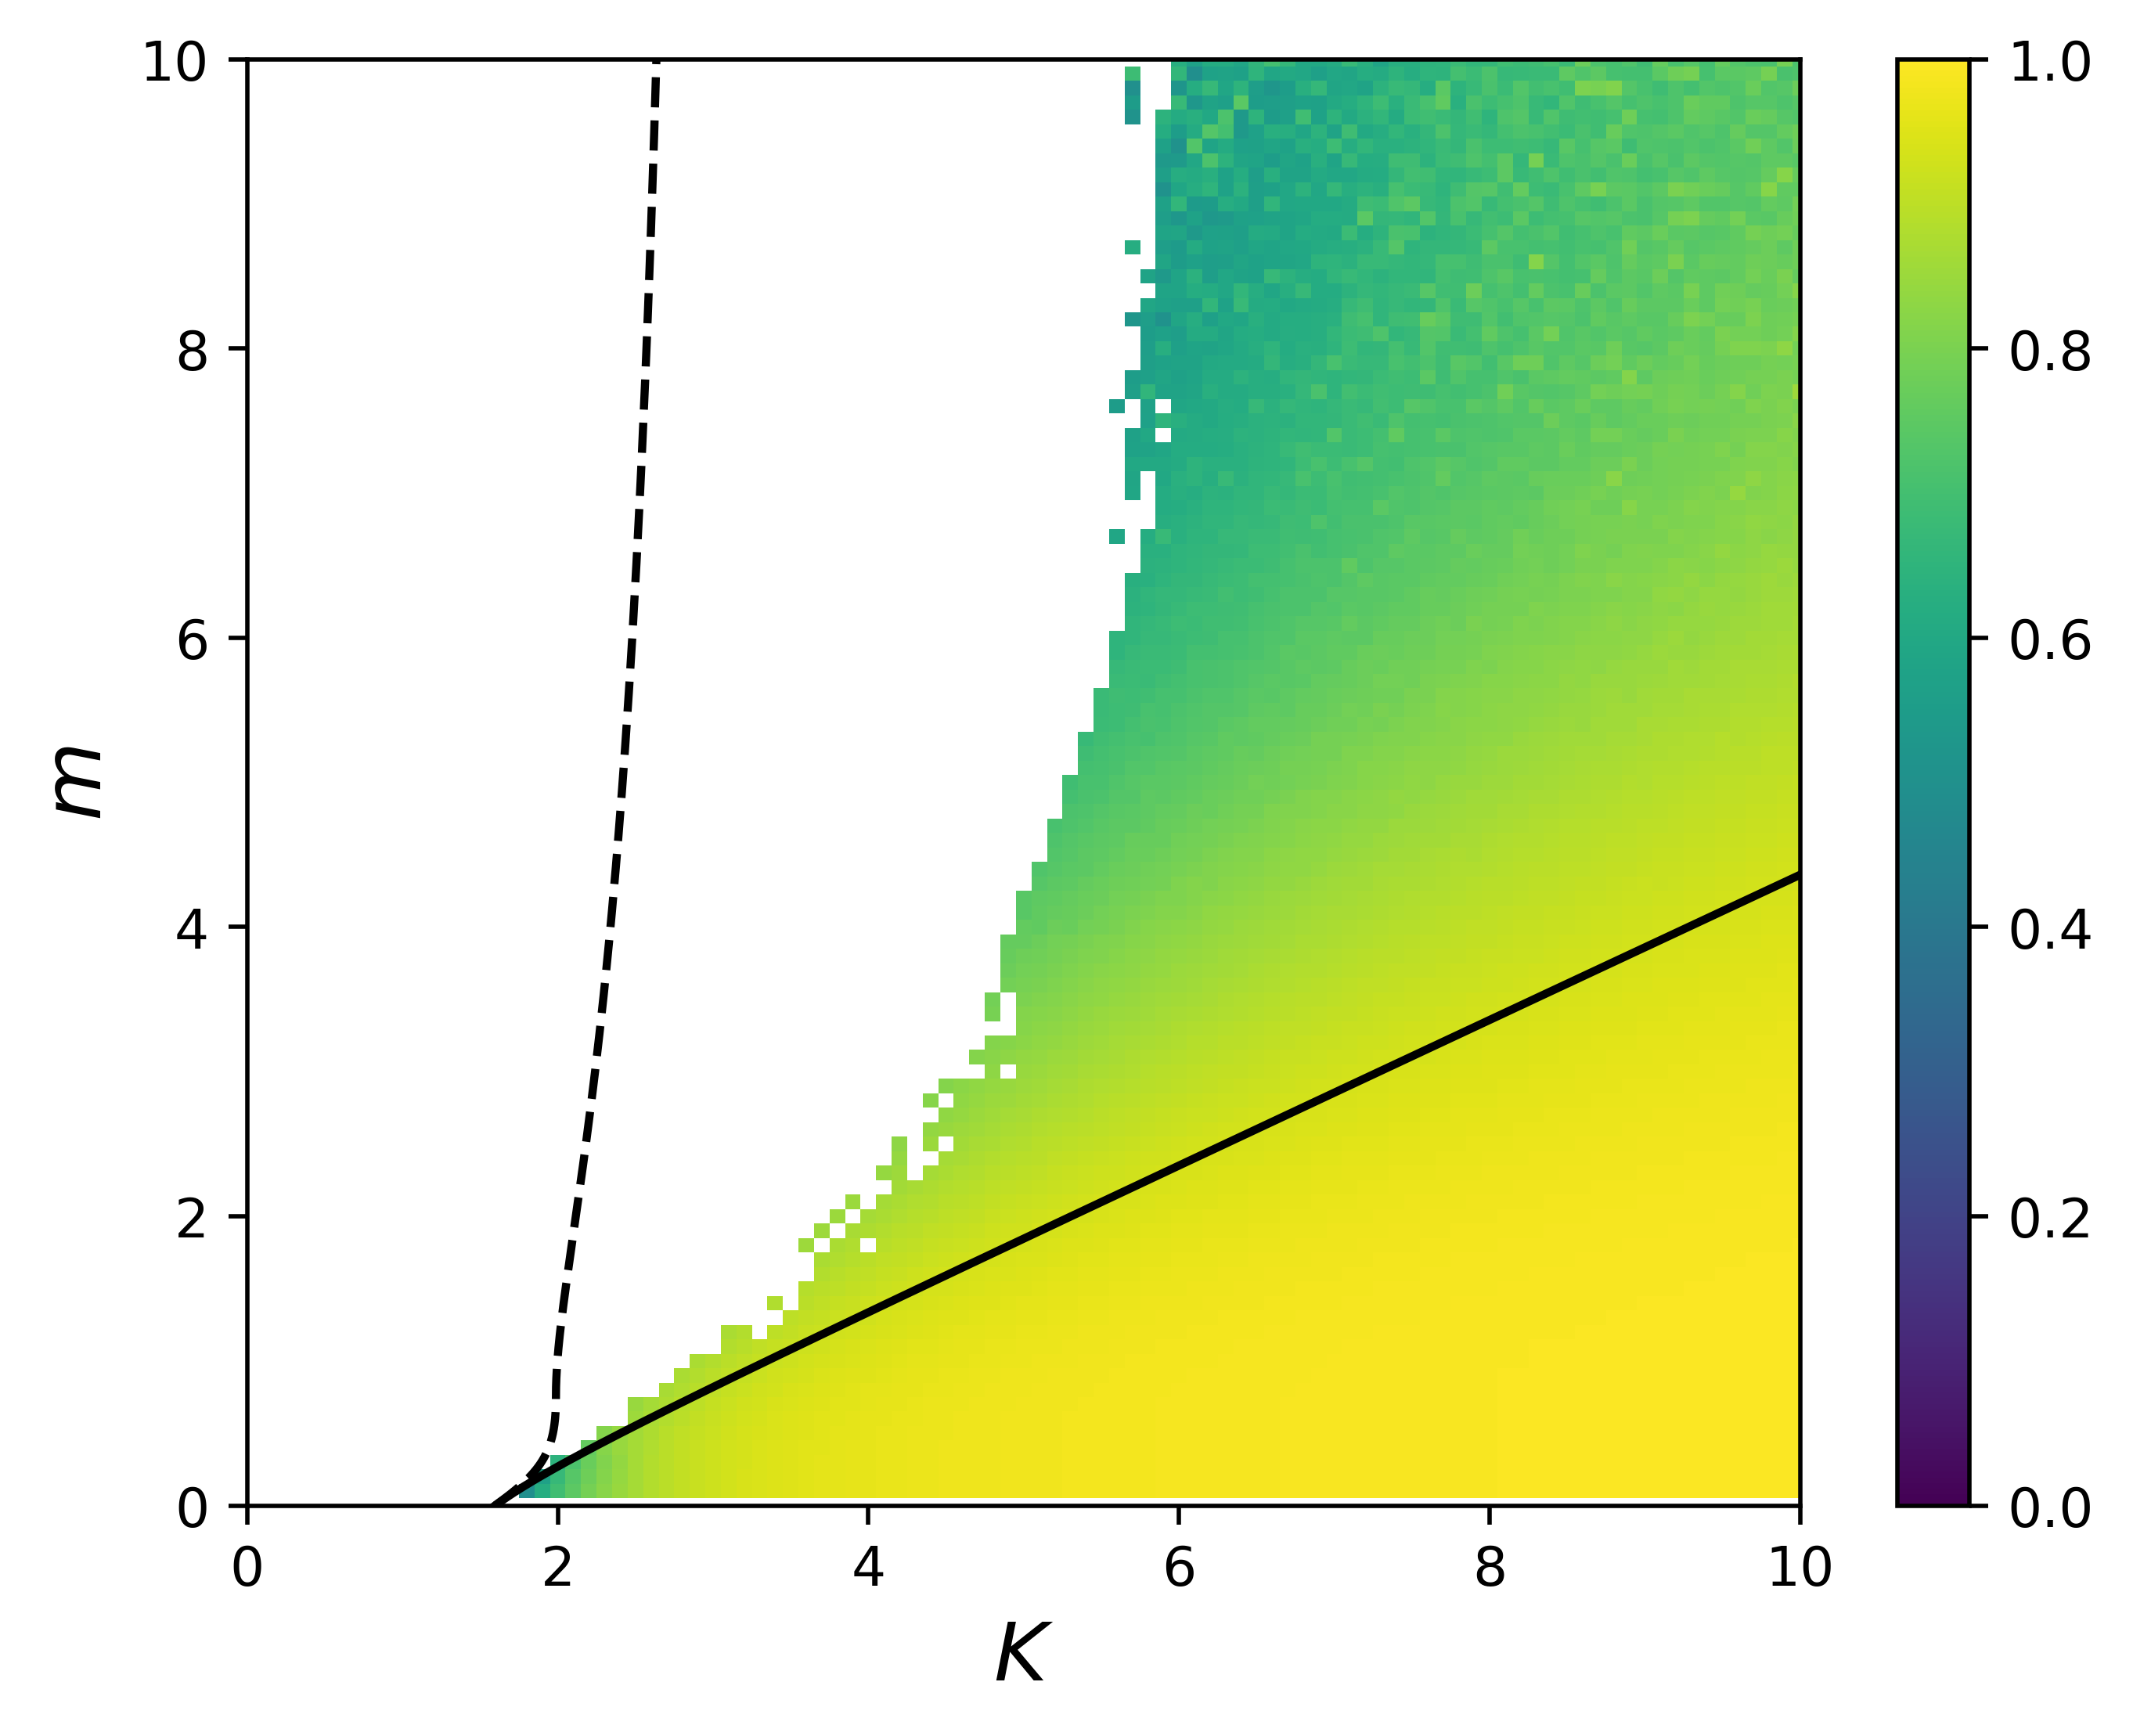

In [252]:
plt.figure(dpi=500)
X = np.isnan(RP)
Y = RP>=RD/2
Z = np.isnan(NR0)
plt.pcolormesh(KK,MM,NR0,vmin=0,vmax=1)
plt.plot(K_cs,m_Kc,'k-')
plt.plot(K_mins,m_Kc,'k--')
cbar = plt.colorbar()
plt.xlim(0,10)
plt.ylim(0,10)
# cbar.ax.tick_params(labelsize=12)  # Adjust the font size of the colorbar ticks
# cbar.set_label(r'$R_{lock,sim}$', fontsize=15)  # Set the font size of the colorbar label
# plt.title(r'$r_{0,sim}>0.1$',fontsize=15)
# plt.title(r'$r_{+,analytic}<|r_{drift}/2|,N = {5000}$',fontsize=15)

plt.xlabel('$K$',fontsize=15)
plt.ylabel('$m$',fontsize=15)


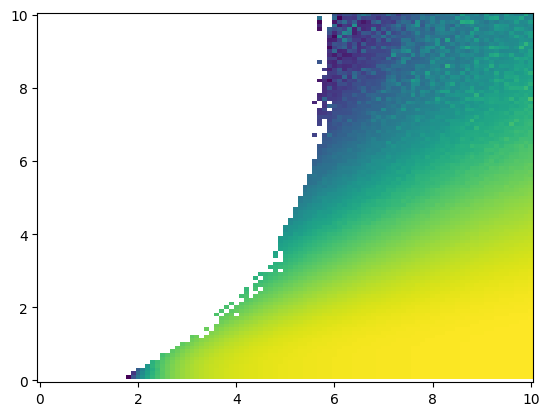

In [244]:
plt.figure(dpi=500)
X = np.isnan(RP)
Y = RP>=RD/2
Z = np.isnan(NR0)
plt.pcolormesh(KK,MM,NR0,vmin=0,vmax=1)
plt.plot(K_cs,m_Kc,'k-')
plt.plot(K_mins,m_Kc,'k--')
cbar = plt.colorbar()
plt.xlim(0,10)
plt.ylim(0,10)
# cbar.ax.tick_params(labelsize=12)  # Adjust the font size of the colorbar ticks
# cbar.set_label(r'$R_{lock,sim}$', fontsize=15)  # Set the font size of the colorbar label
# plt.title(r'$r_{0,sim}>0.1$',fontsize=15)
# plt.title(r'$r_{+,analytic}<|r_{drift}/2|,N = {5000}$',fontsize=15)

plt.xlabel('$K$',fontsize=15)
plt.ylabel('$m$',fontsize=15)


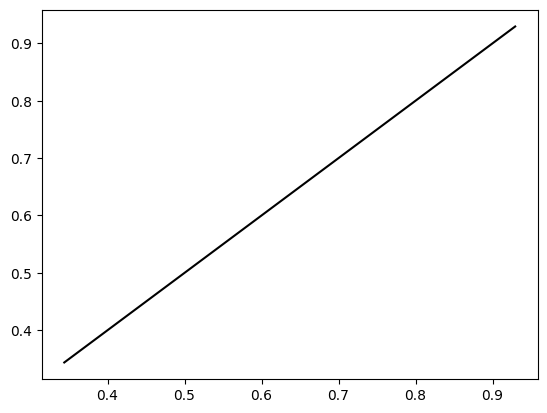

In [89]:
plt.plot(l,l,c='k')

In [93]:
def nan_corrcoef(a,b):
    a = a.flatten()
    b = b.flatten()
    nan_idx1 = np.isnan(a)
    nan_idx2 = np.isnan(b)
    nan_idx = nan_idx1 | nan_idx2
    a = a[~nan_idx]
    b = b[~nan_idx]
    return np.corrcoef(a,b)[0,1]
nan_corrcoef(Rthr,Rsim)

0.9363216531107291

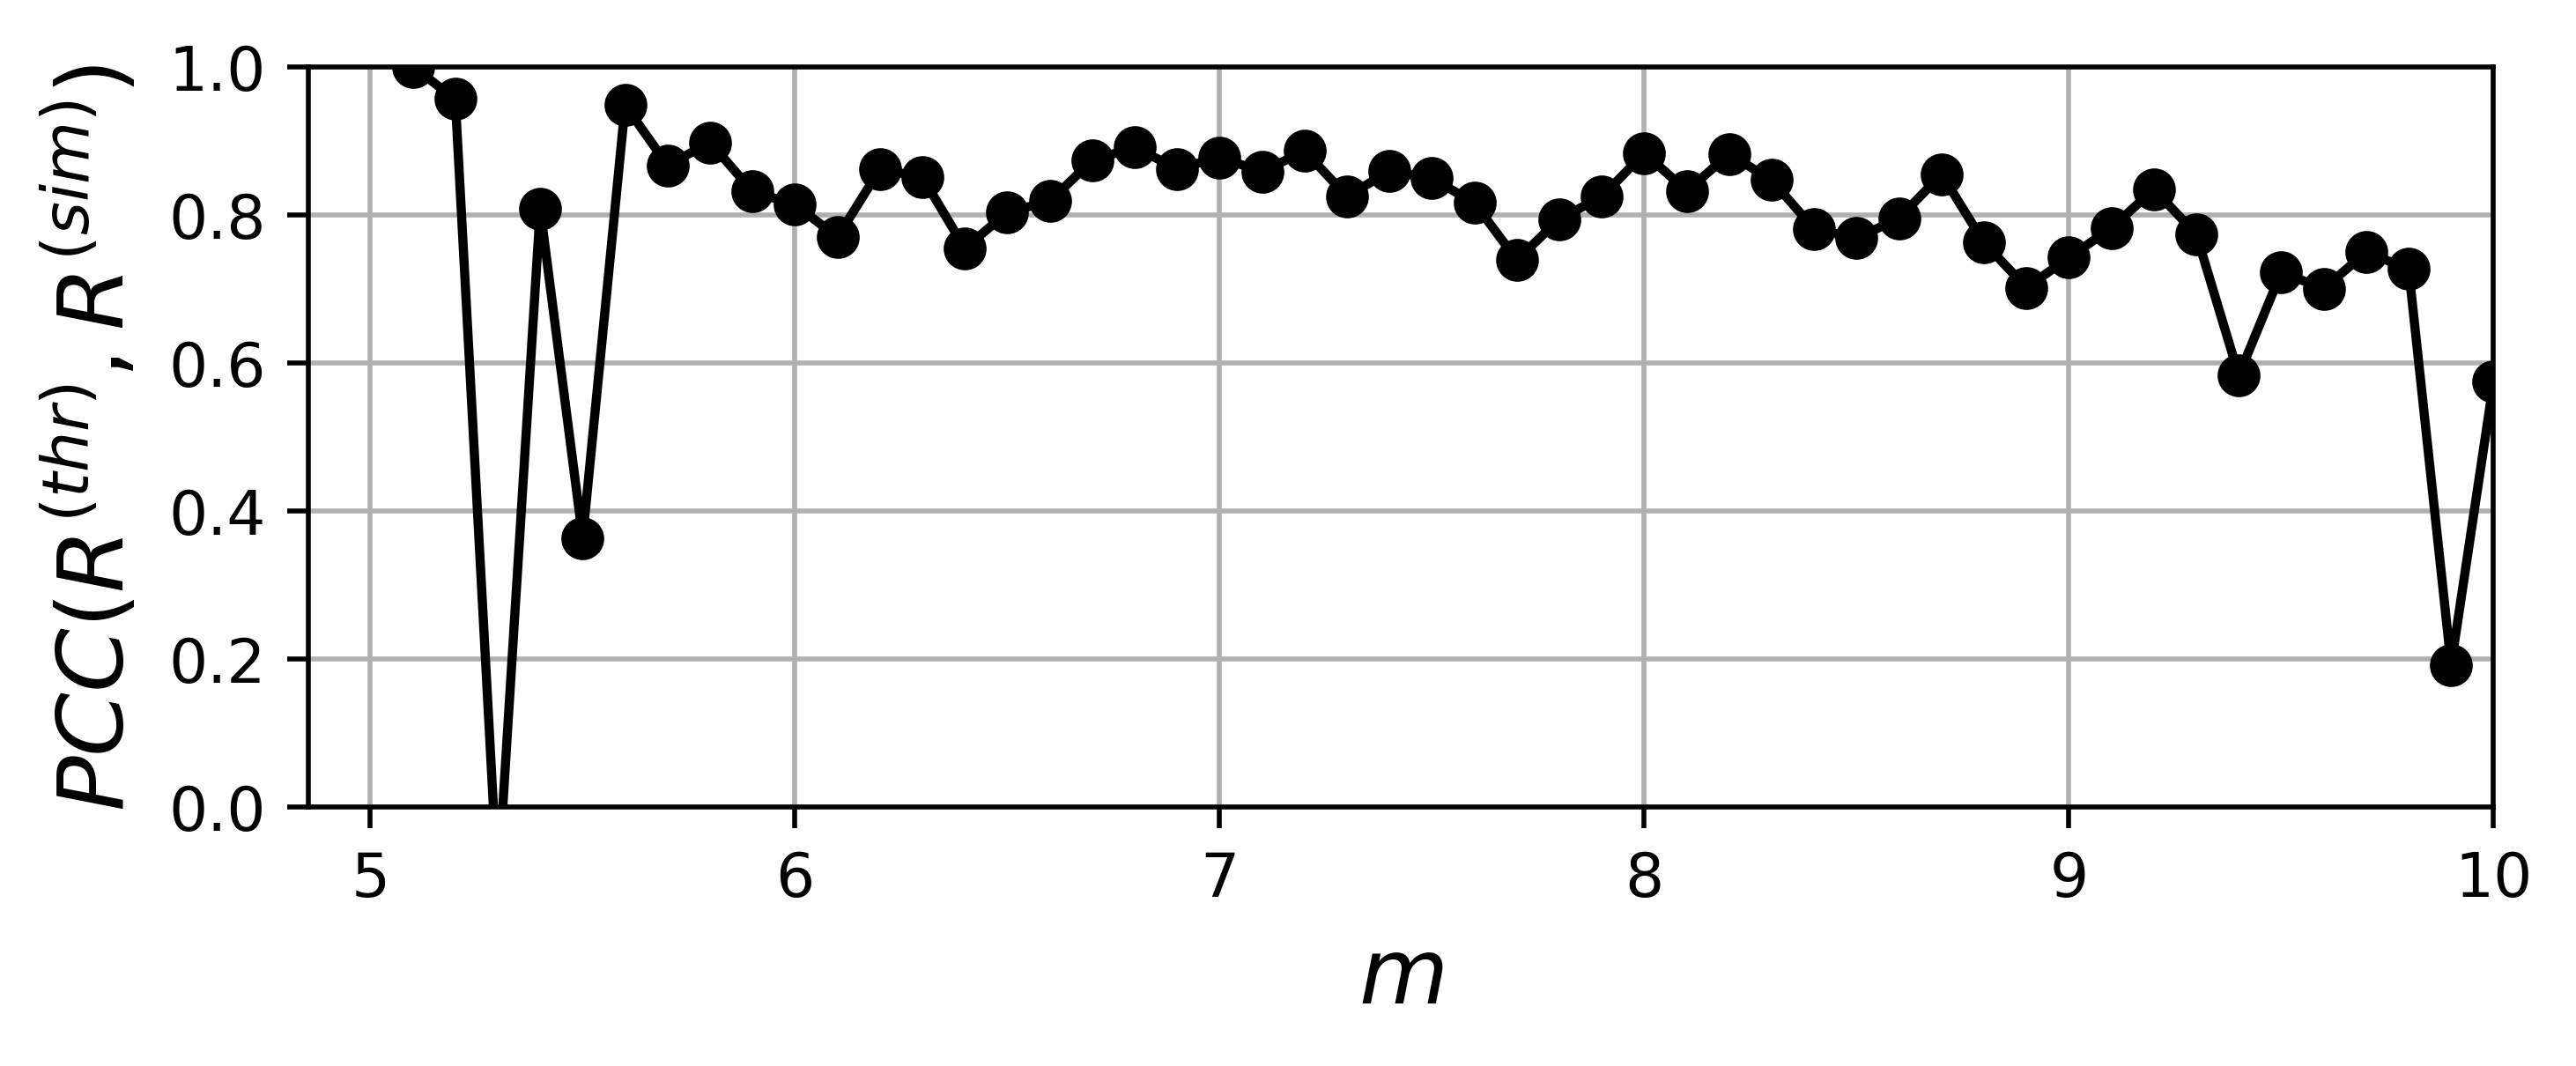

In [224]:
def nan_corrcoef(a,b):
    a = a.flatten()
    b = b.flatten()
    nan_idx1 = np.isnan(a)
    nan_idx2 = np.isnan(b)
    nan_idx = nan_idx1 | nan_idx2
    a = a[~nan_idx]
    b = b[~nan_idx]
    return np.corrcoef(a,b)[0,1]

S = Rthr
NS = Rsim
c_sigs = []
for i in range(0,101,1):
    c = nan_corrcoef(S[:,i], NS[:,i])
    c_sigs.append(c)
c_sigs = np.array(c_sigs)
plt.figure(dpi=500)
plt.subplot(211)
plt.plot(np.linspace(0,10,101),c_sigs,'ko-')
plt.xlabel('$m$',fontsize=15)
plt.ylabel('$PCC(R^{(thr)},R^{(sim)})$',fontsize=15)
plt.ylim(0.0,1)
plt.xlim(right=10)
plt.grid()
plt.show()

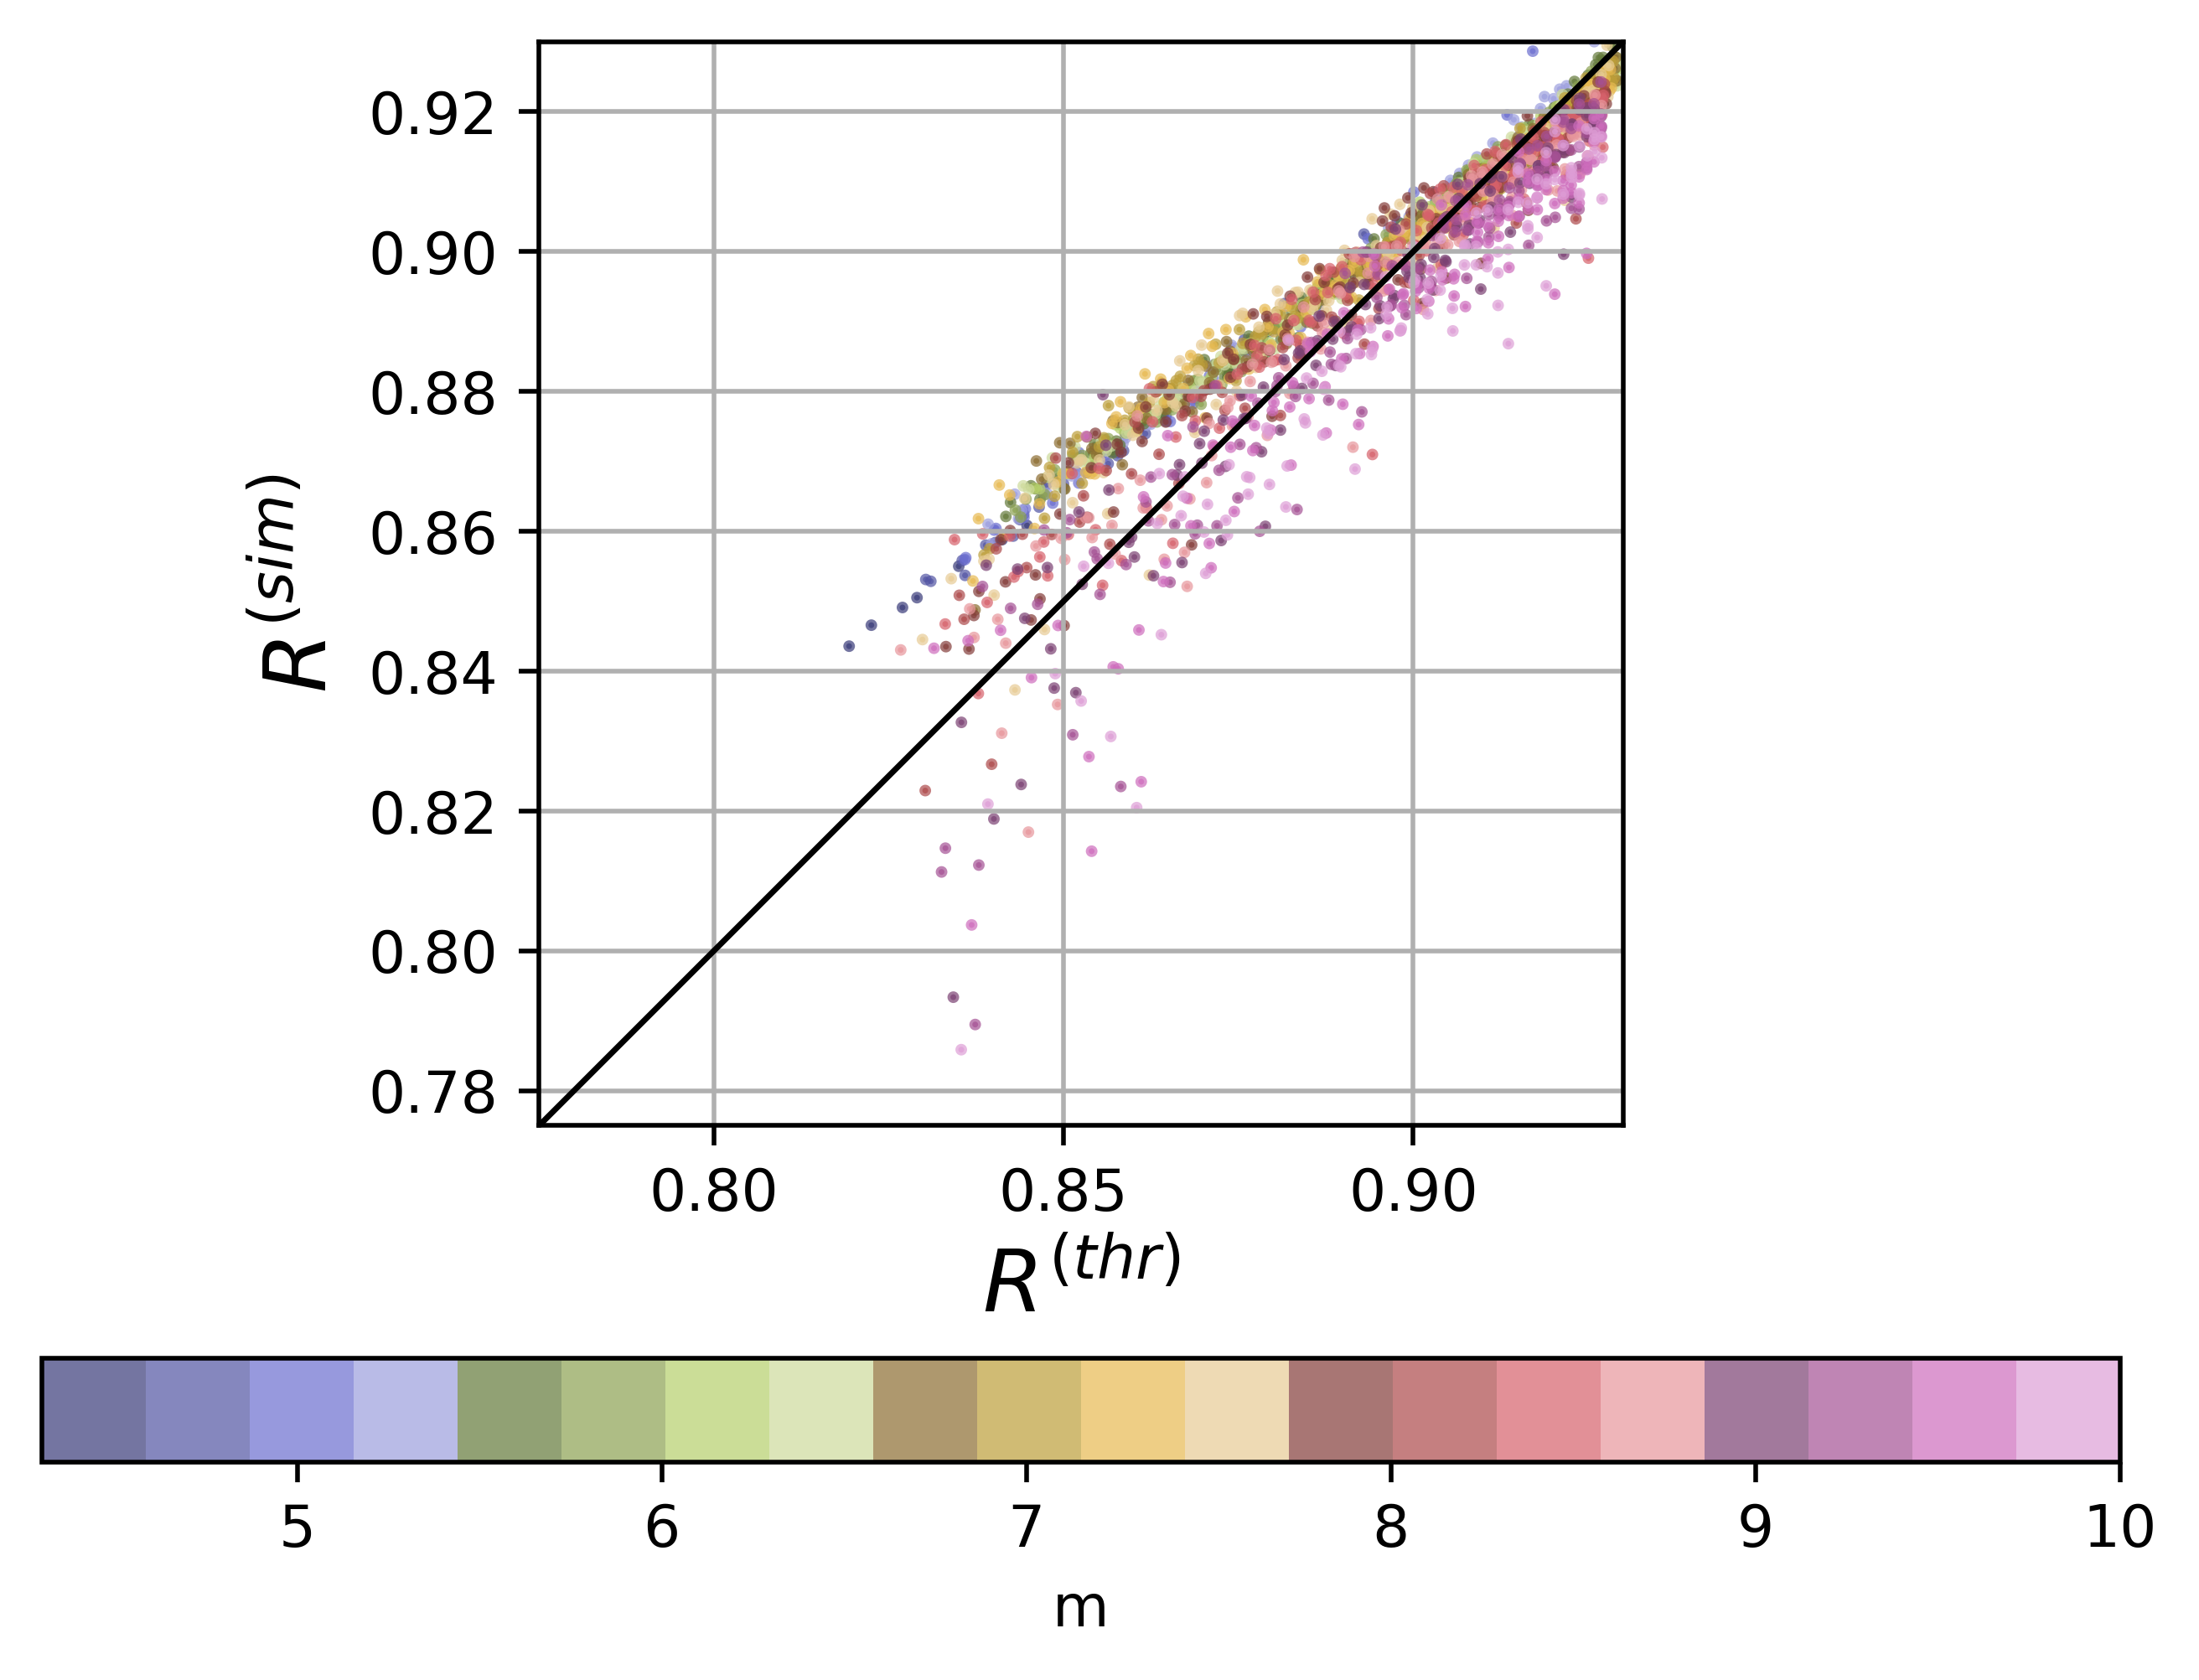

In [237]:
Rthr = R0 + 2*RP
Rsim = NR0 + NRP + NRM
plt.figure(dpi=500)
plt.scatter(Rthr,Rsim,s=1,c=MM,alpha=0.7,cmap='tab20b')
l = (0.775,0.93)
plt.plot(l,l,c='k',lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.775,0.93)
plt.ylim(0.775,0.93)
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$R^{(sim)}$',fontsize=15)
plt.xlabel(r'$R^{(thr)}$',fontsize=15)
plt.colorbar(label='m',orientation='horizontal')
plt.grid()



Text(0.5, 0, '$R^{(thr)}$')

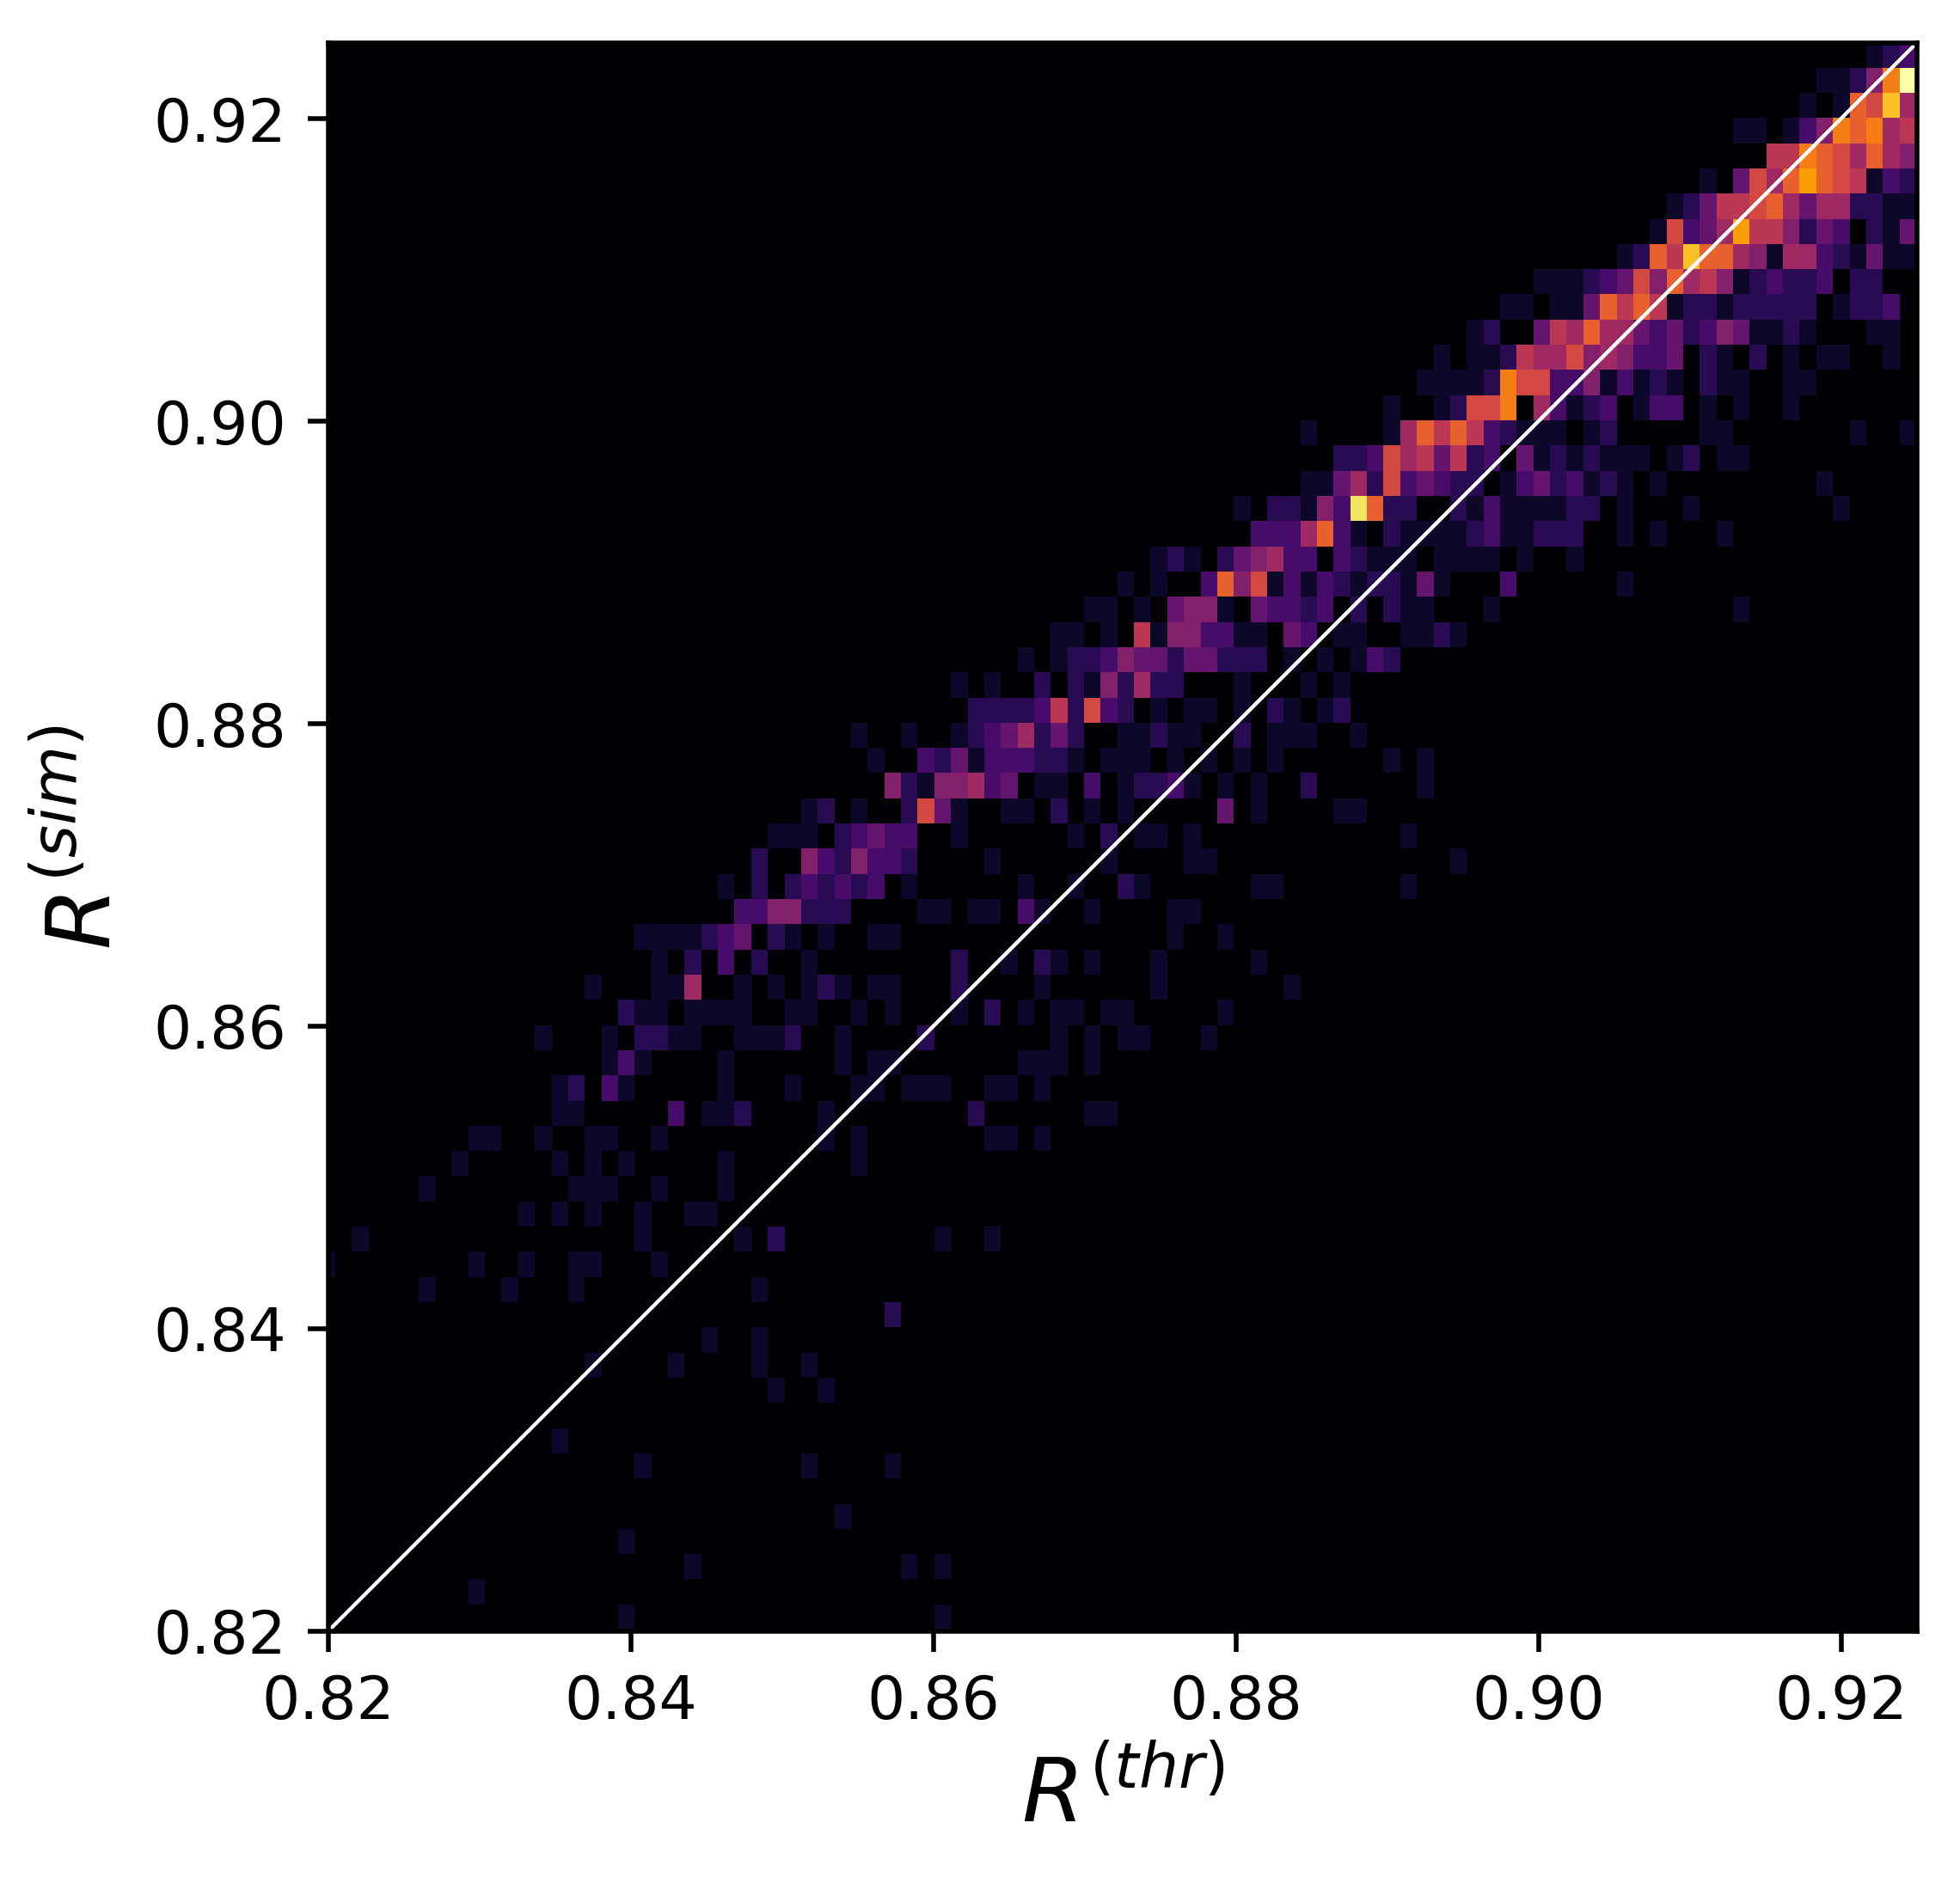

In [243]:
plt.figure(dpi=500)
# Filter out NaN values from A_RPU and RP
valid_indices = ~np.isnan(Rthr) & ~np.isnan(Rsim)
filtered_A_RPU = Rthr[valid_indices]
filtered_RP = Rsim[valid_indices]

# Plot the 2D histogram
plt.hist2d(filtered_A_RPU, filtered_RP, bins=100, cmap='inferno')
# Plot the diagonal line
plt.plot(filtered_RP, filtered_RP, lw=0.5, c='w')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.82,0.925)
plt.ylim(0.82,0.925)
plt.ylabel('$R^{(sim)}$',fontsize=15)
plt.xlabel('$R^{(thr)}$',fontsize=15)

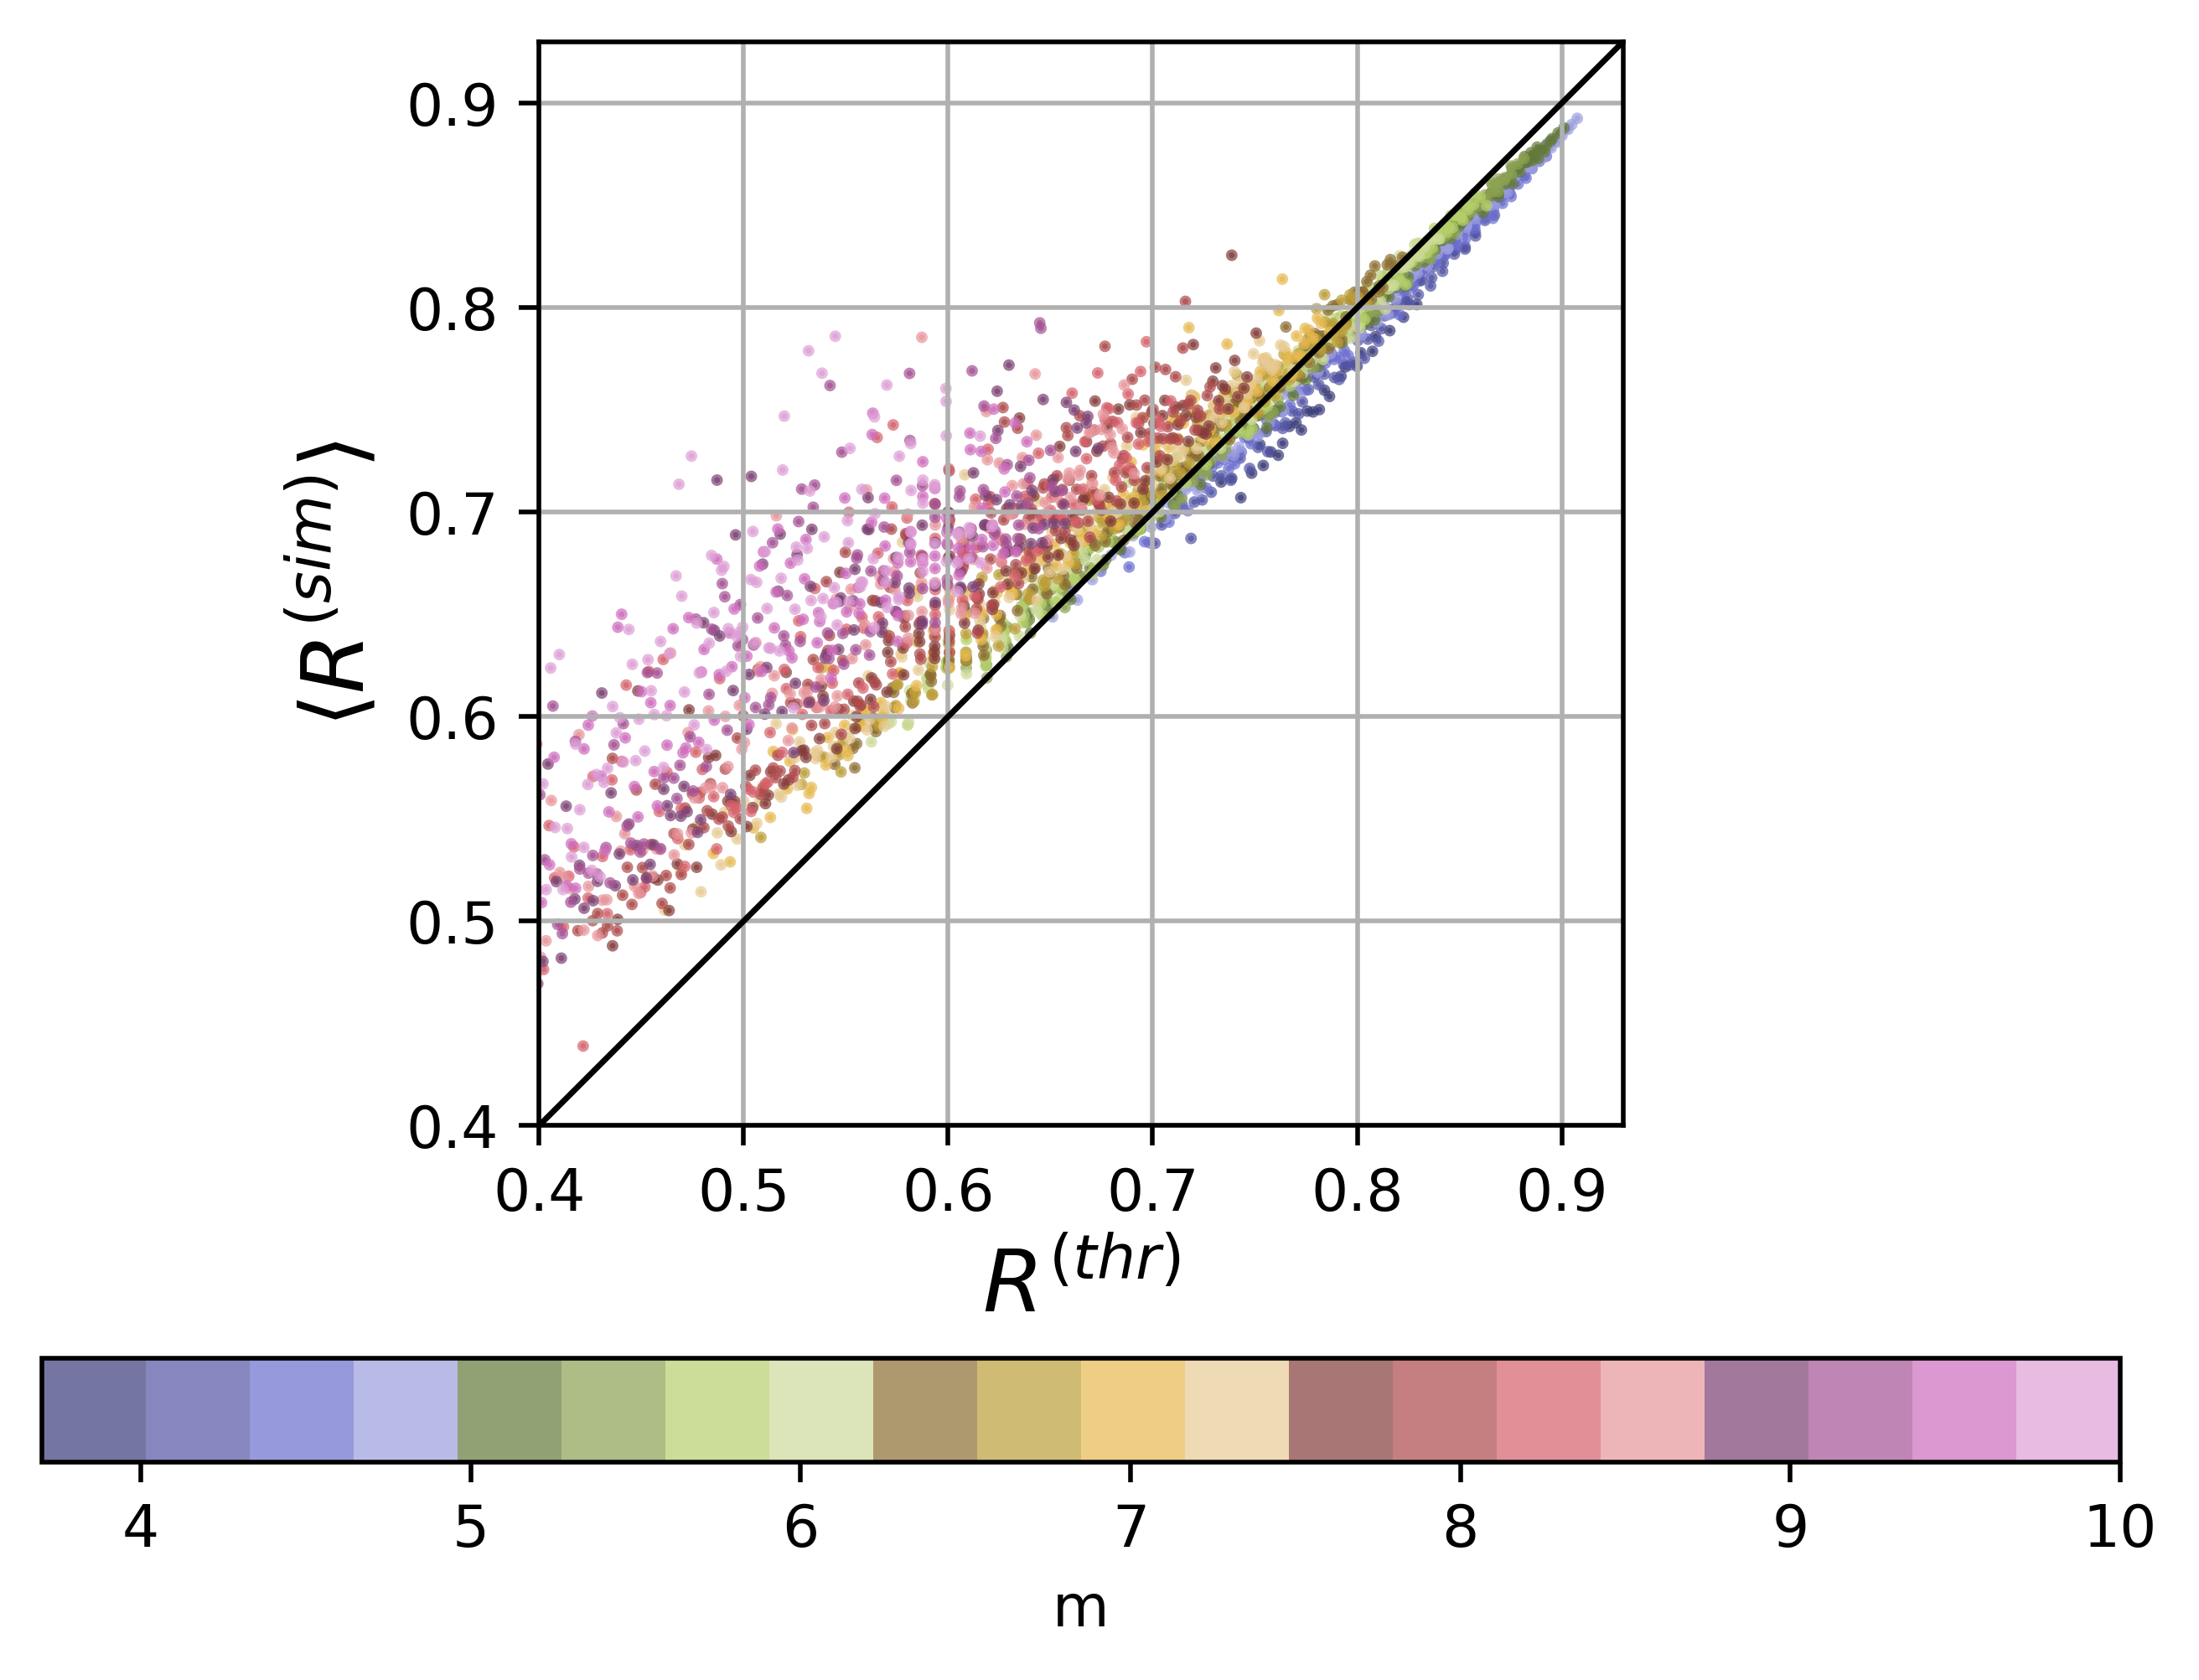

In [236]:
Rthr = R_TM
Rsim = NR
plt.figure(dpi=500)
plt.scatter(Rthr,Rsim,s=1,c=MM,alpha=0.7,cmap='tab20b')
l = (0.4,0.93)
plt.plot(l,l,c='k',lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.4,0.93)
plt.ylim(0.4,0.93)
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$\left\langle R^{(sim)}\right\rangle$',fontsize=15)
plt.xlabel(r'$R^{(thr)}$',fontsize=15)
plt.colorbar(label='m',orientation='horizontal')
plt.grid()



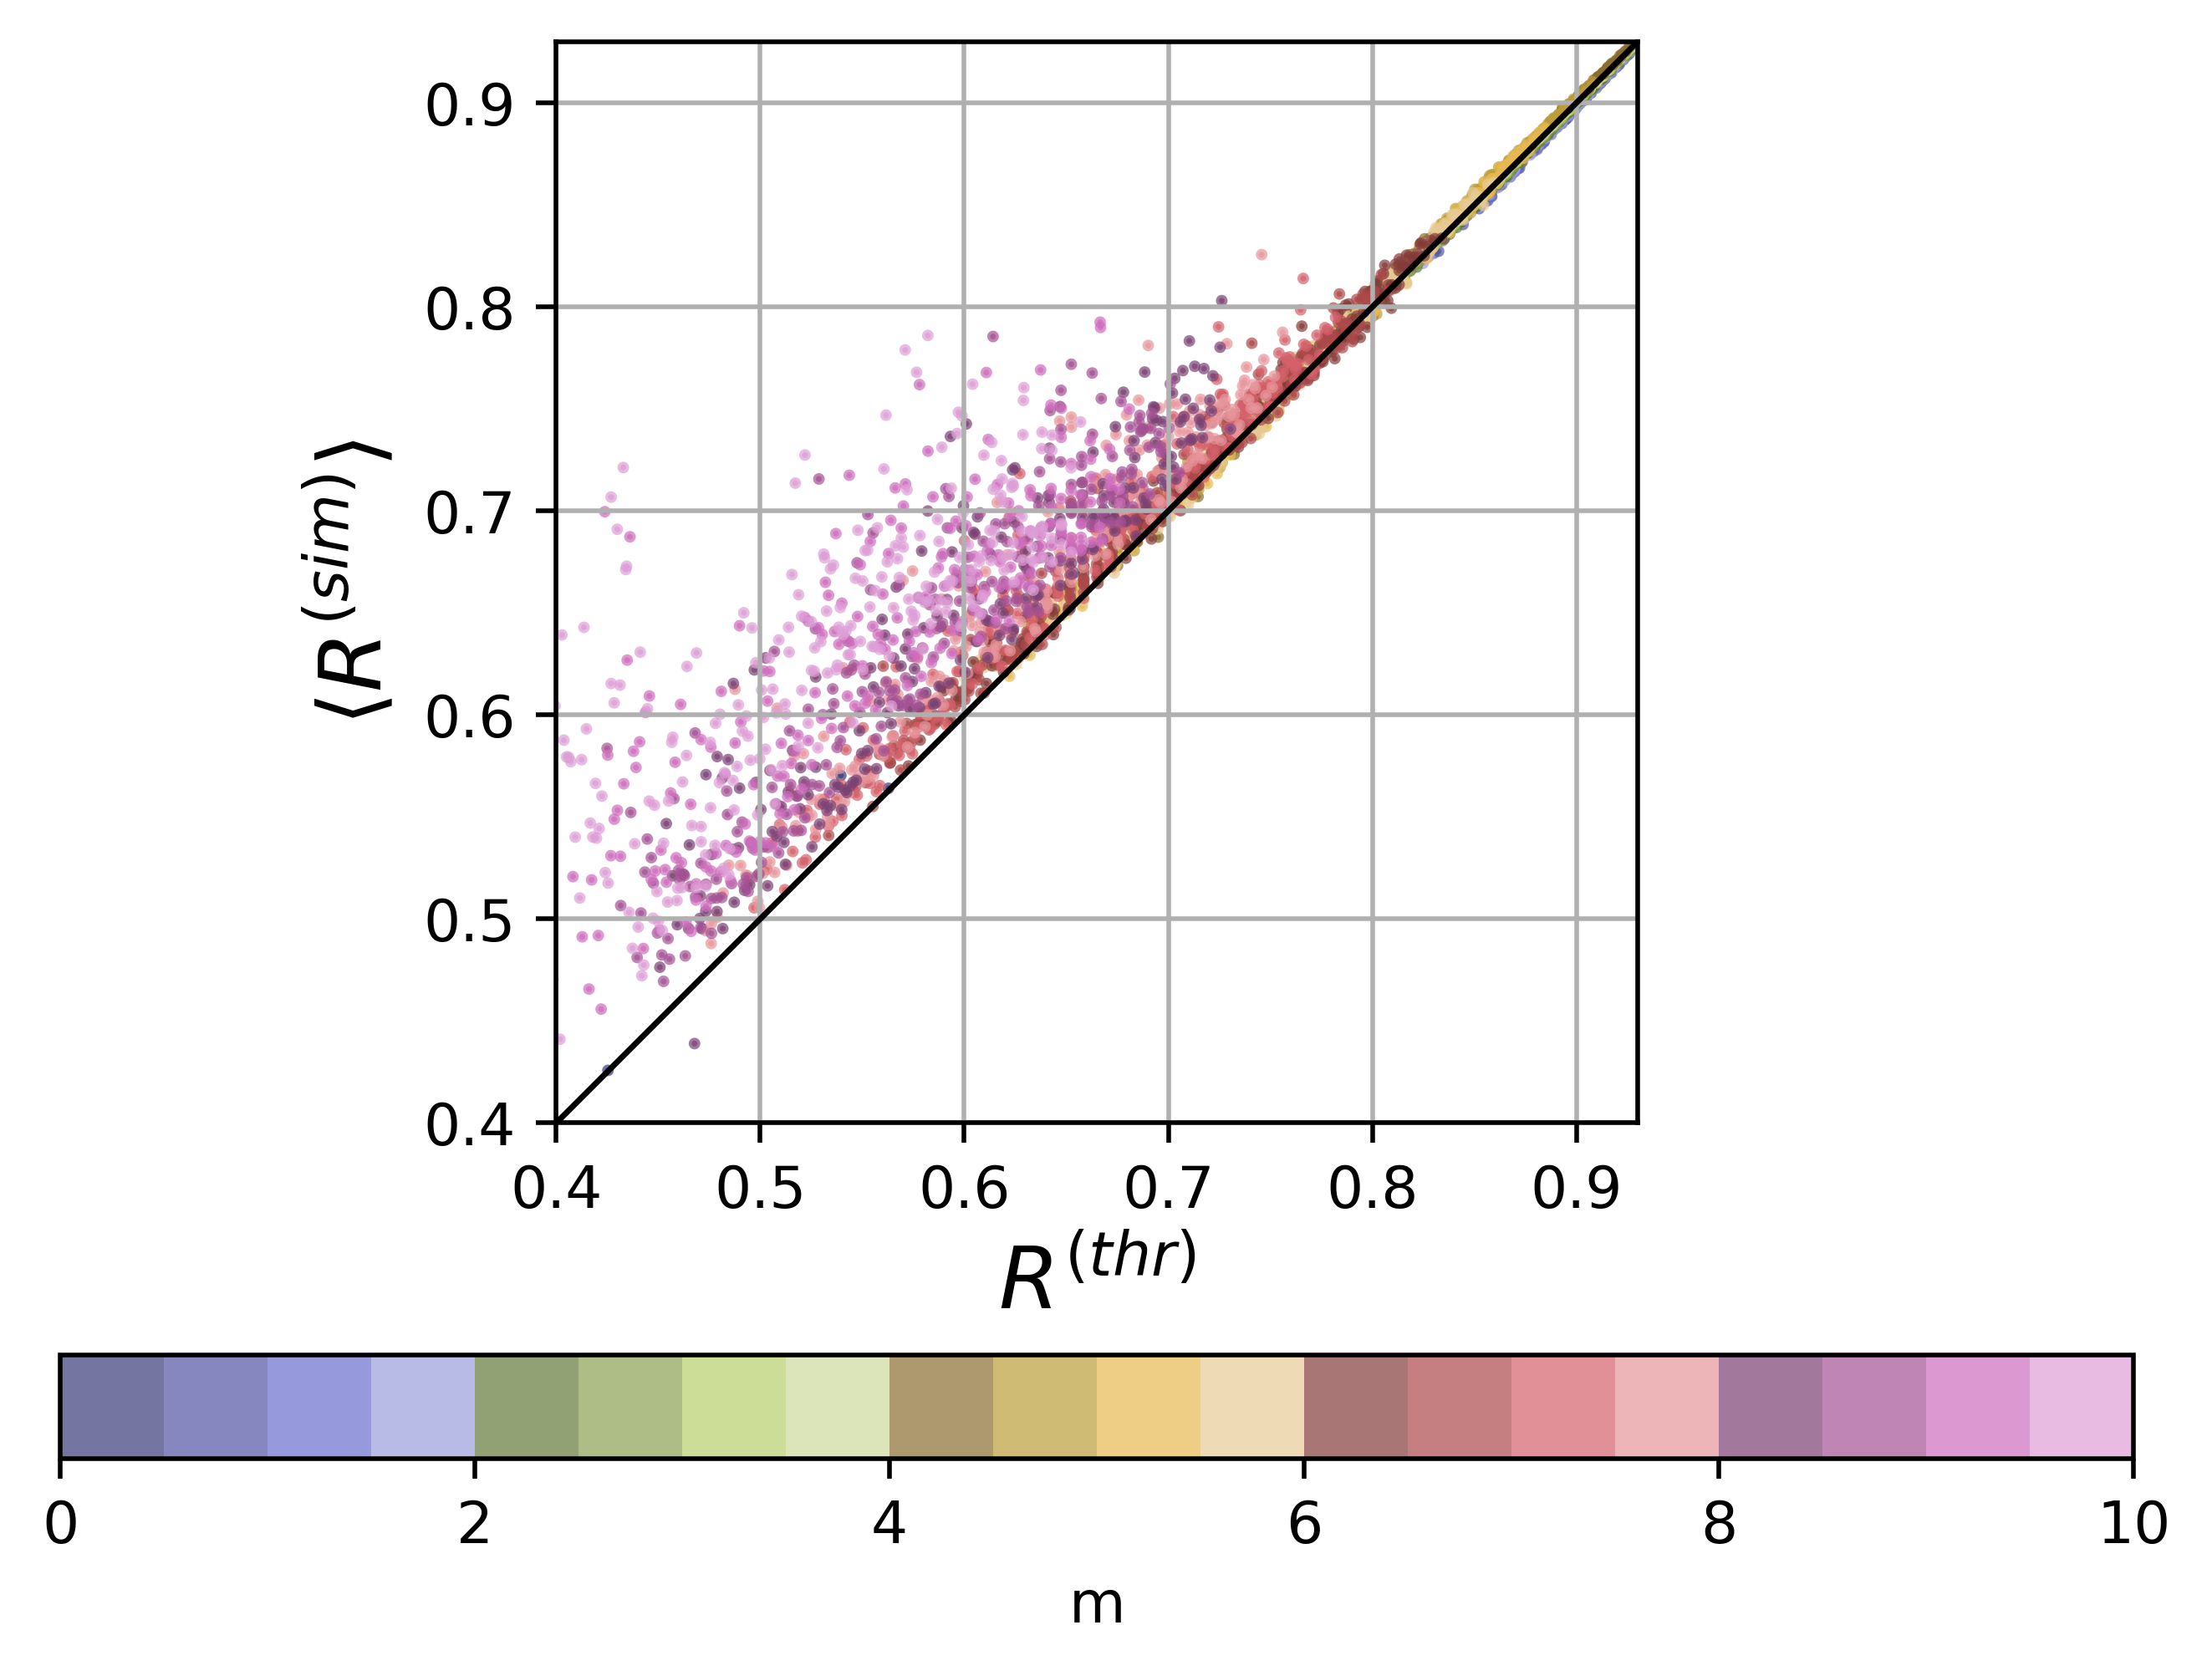

In [235]:
Rthr = R
Rsim = NR
plt.figure(dpi=500)
plt.scatter(Rthr,Rsim,s=1,c=MM,alpha=0.7,cmap='tab20b')
l = (0.4,0.93)
plt.plot(l,l,c='k',lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.4,0.93)
plt.ylim(0.4,0.93)
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$\left\langle R^{(sim)}\right\rangle$',fontsize=15)
plt.xlabel(r'$R^{(thr)}$',fontsize=15)
plt.colorbar(label='m',orientation='horizontal')
plt.grid()



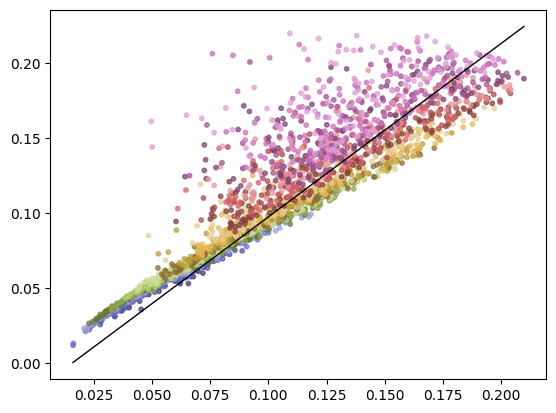

In [225]:
C = np.where(~np.isnan(NRP),NSIG_S,np.nan)
plt.scatter(C,sig_r,c=MM,s=10,alpha=0.7,cmap='tab20b')
plt.plot([np.nanmin(C),np.nanmax(C)],[np.nanmin(sig_r),np.nanmax(sig_r)],color='k',lw=1)

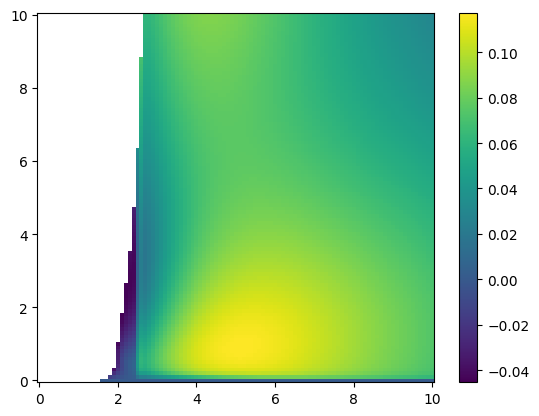

In [47]:
plt.pcolormesh(KK,MM,R-R_TM)

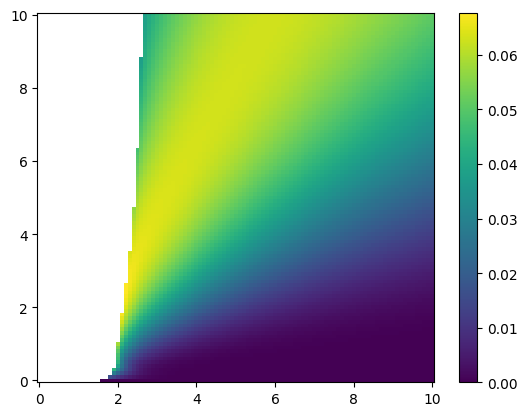

In [44]:
plt.pcolormesh(KK,MM,RD)
plt.colorbar()

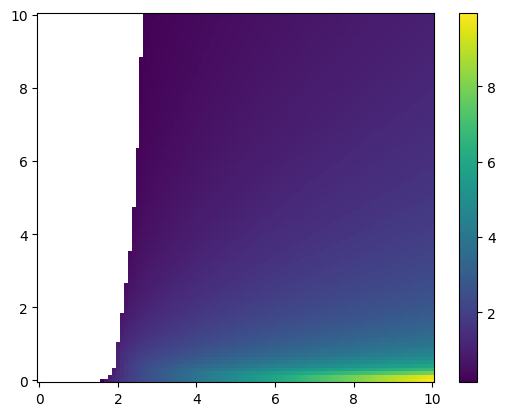

In [26]:
plt.pcolormesh(KK,MM,OPS)
plt.colorbar()

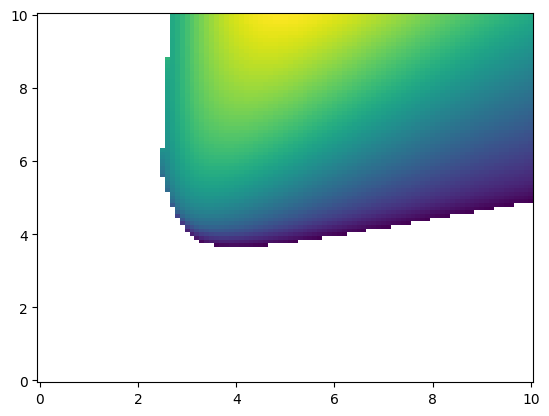

In [6]:
plt.pcolormesh(KK,MM,A_RRP['RP'])
# np.savez('Simul/RR_RP.npz',RP=RP,RPl=RPl,R=R_us,R0=R_0us,Ks=K_,ms=m_,allow_pickle=True)


In [109]:
mcs_rp0 = np.load('Simul/mcs_rp0.npz',allow_pickle=True)
mcs_rpdh = np.load('Simul/mcs_rpdh.npz',allow_pickle=True)


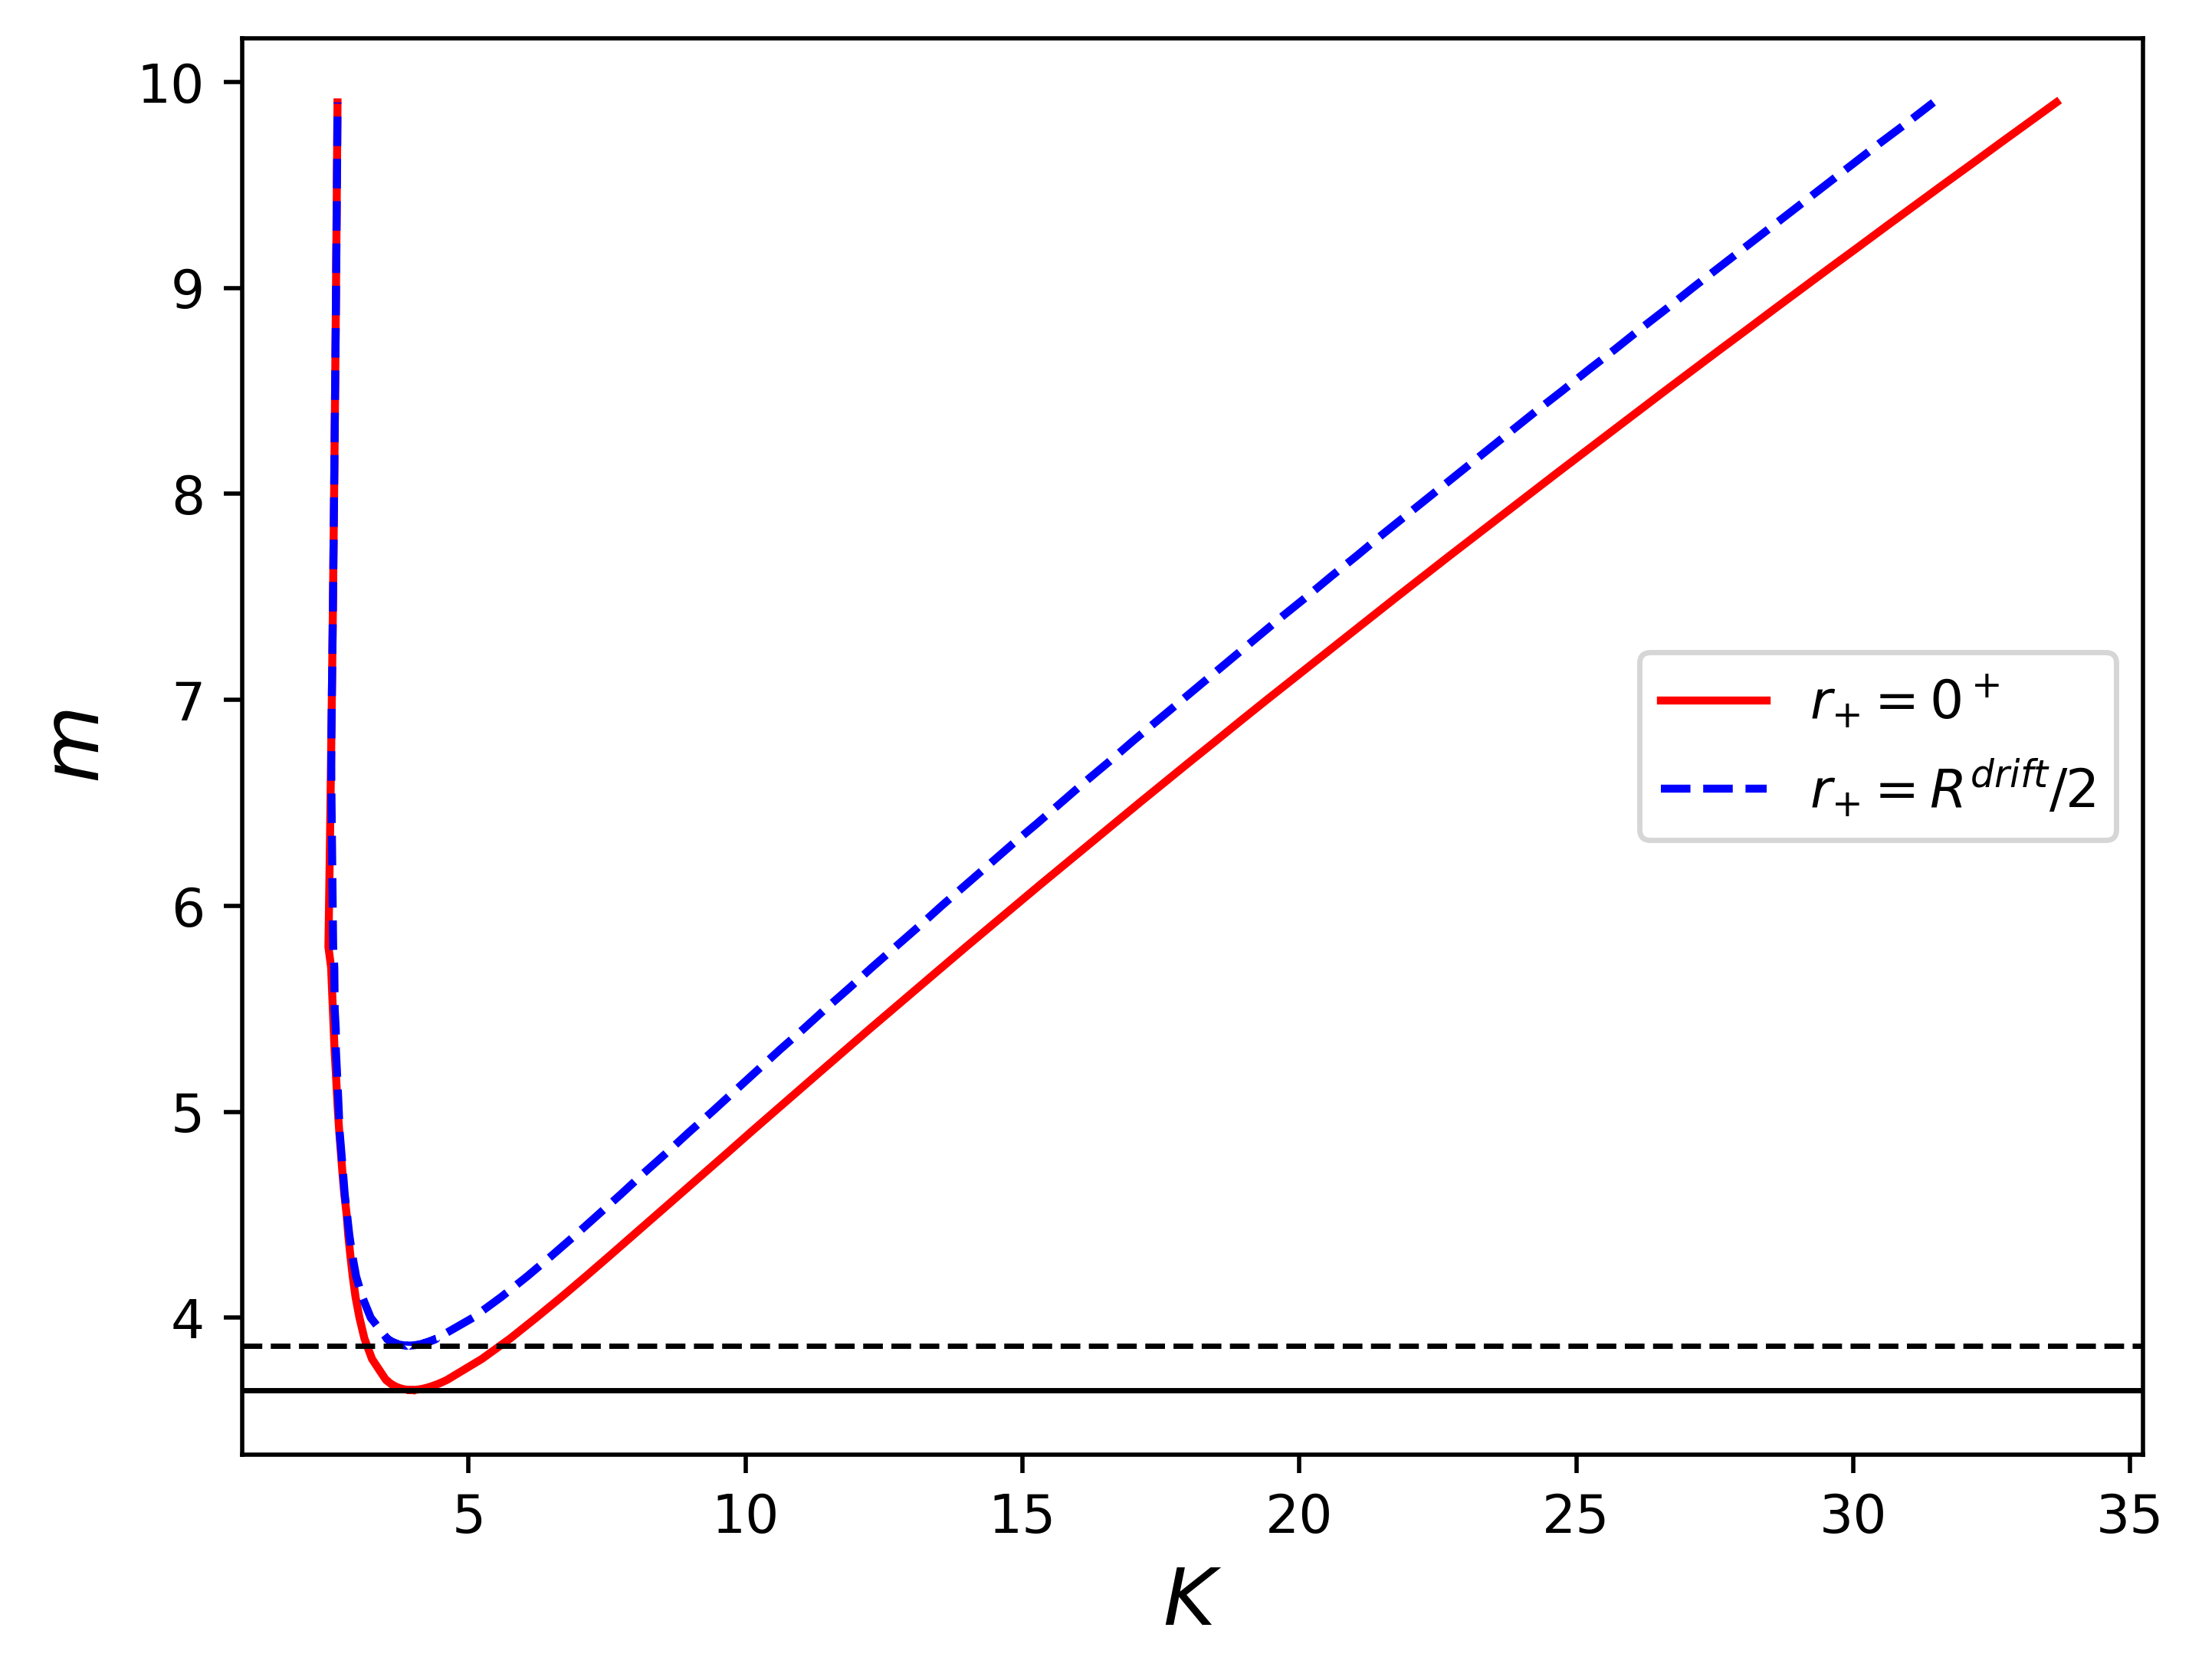

In [119]:
ms_rp0=mcs_rp0['ms']
K_rp0u=mcs_rp0['K_u']
K_rp0d=mcs_rp0['K_d']

ms_rpdh=mcs_rpdh['ms']
K_rpdhu=mcs_rpdh['K_u']
K_rpdhd=mcs_rpdh['K_d']

plt.figure(dpi=500)
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}=0^+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}=R^{drift}/2$')
plt.plot(K_rpdhu,ms_rpdh,'b--')

plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.axhline(np.min(ms_rp0),ls='-',c='k',lw=1)
plt.axhline(np.min(ms_rpdh),ls='--',c='k',lw=1)
plt.legend()

In [114]:
np.min(ms_rp0),np.min(ms_rpdh)

(3.6492096000000003, 3.8645426)

Text(0, 0.5, '$m$')

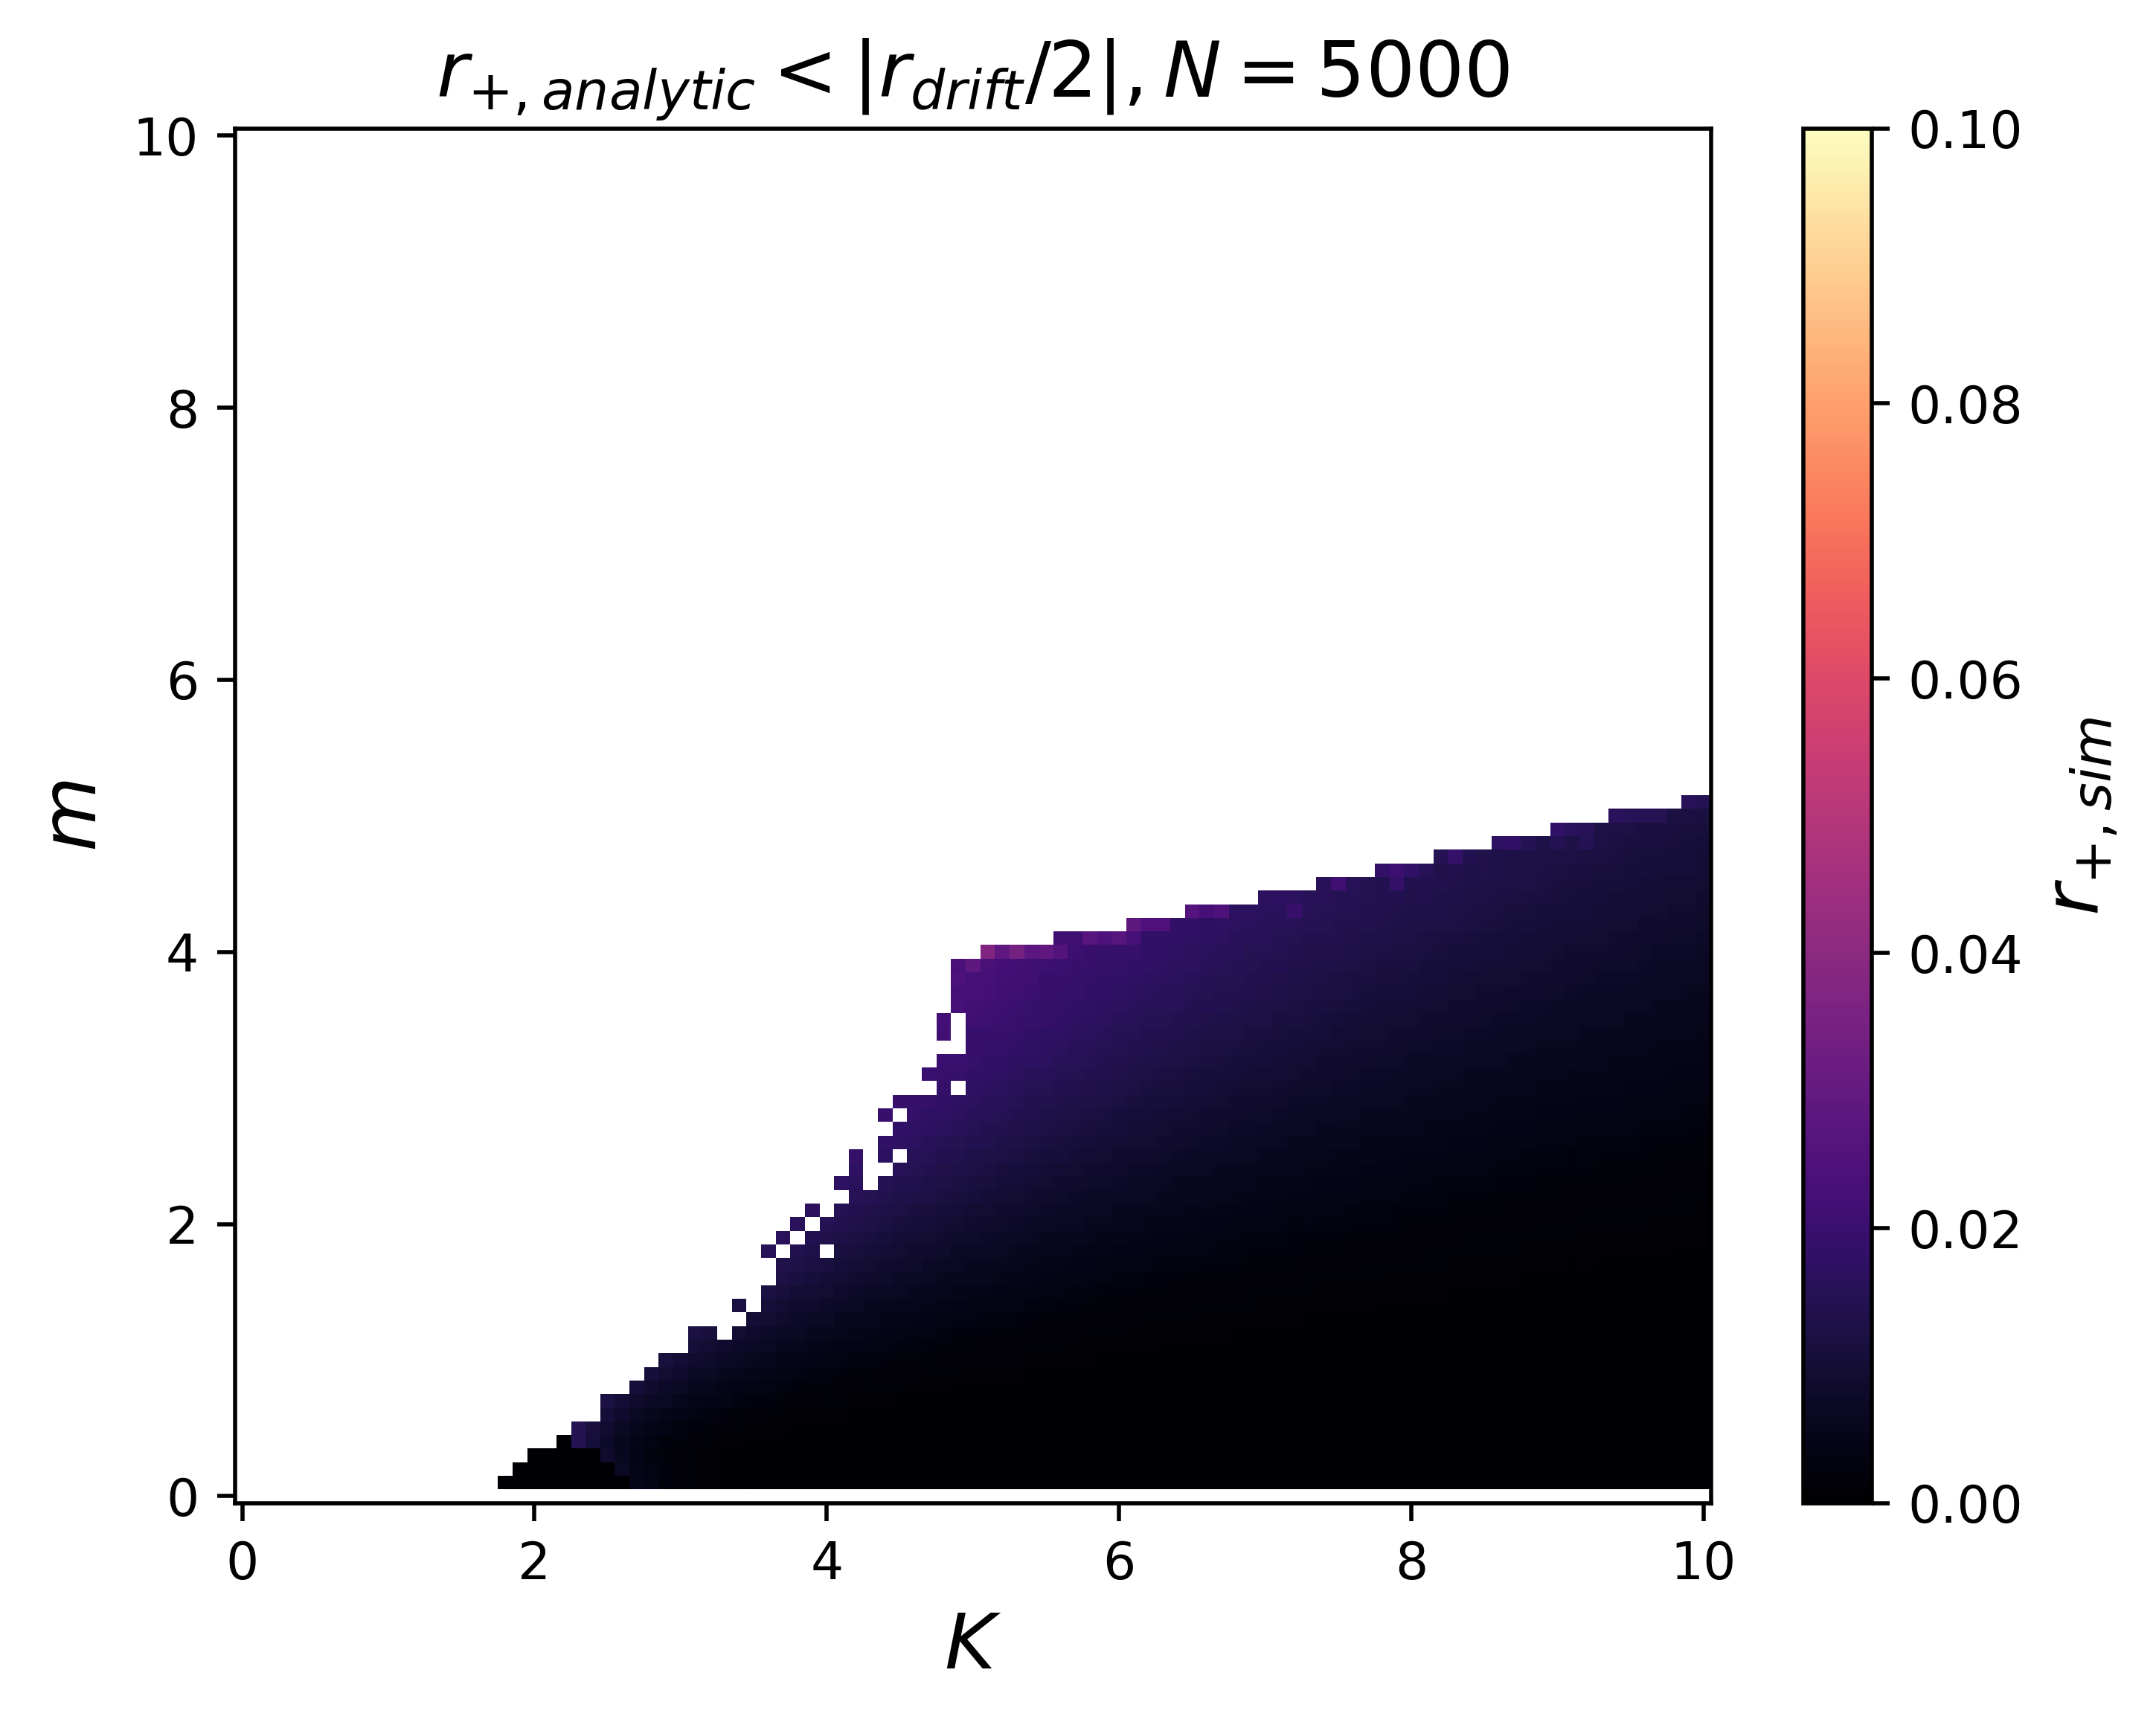

In [98]:
plt.figure(dpi=500)
X = np.isnan(RP)
Y = RP>=RD/2
Z = np.isnan(NR0)
plt.pcolormesh(KK,MM,np.where(~Z&~Y,NRPT,np.nan),cmap='magma',vmin=0,vmax=0.1)
cbar = plt.colorbar(label=r'$r_{+,sim}$')
# cbar.ax.tick_params(labelsize=12)  # Adjust the font size of the colorbar ticks
cbar.set_label(r'$r_{+,sim}$', fontsize=15)  # Set the font size of the colorbar label
# plt.title(r'$r_{0,sim}>0.1$',fontsize=15)
plt.title(r'$r_{+,analytic}<|r_{drift}/2|,N = {5000}$',fontsize=15)

plt.xlabel('$K$',fontsize=15)
plt.ylabel('$m$',fontsize=15)


In [166]:
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import numpy as np

C:\Users\kim9y\AppData\Local\Temp\ipykernel_38252\605740637.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('magma')


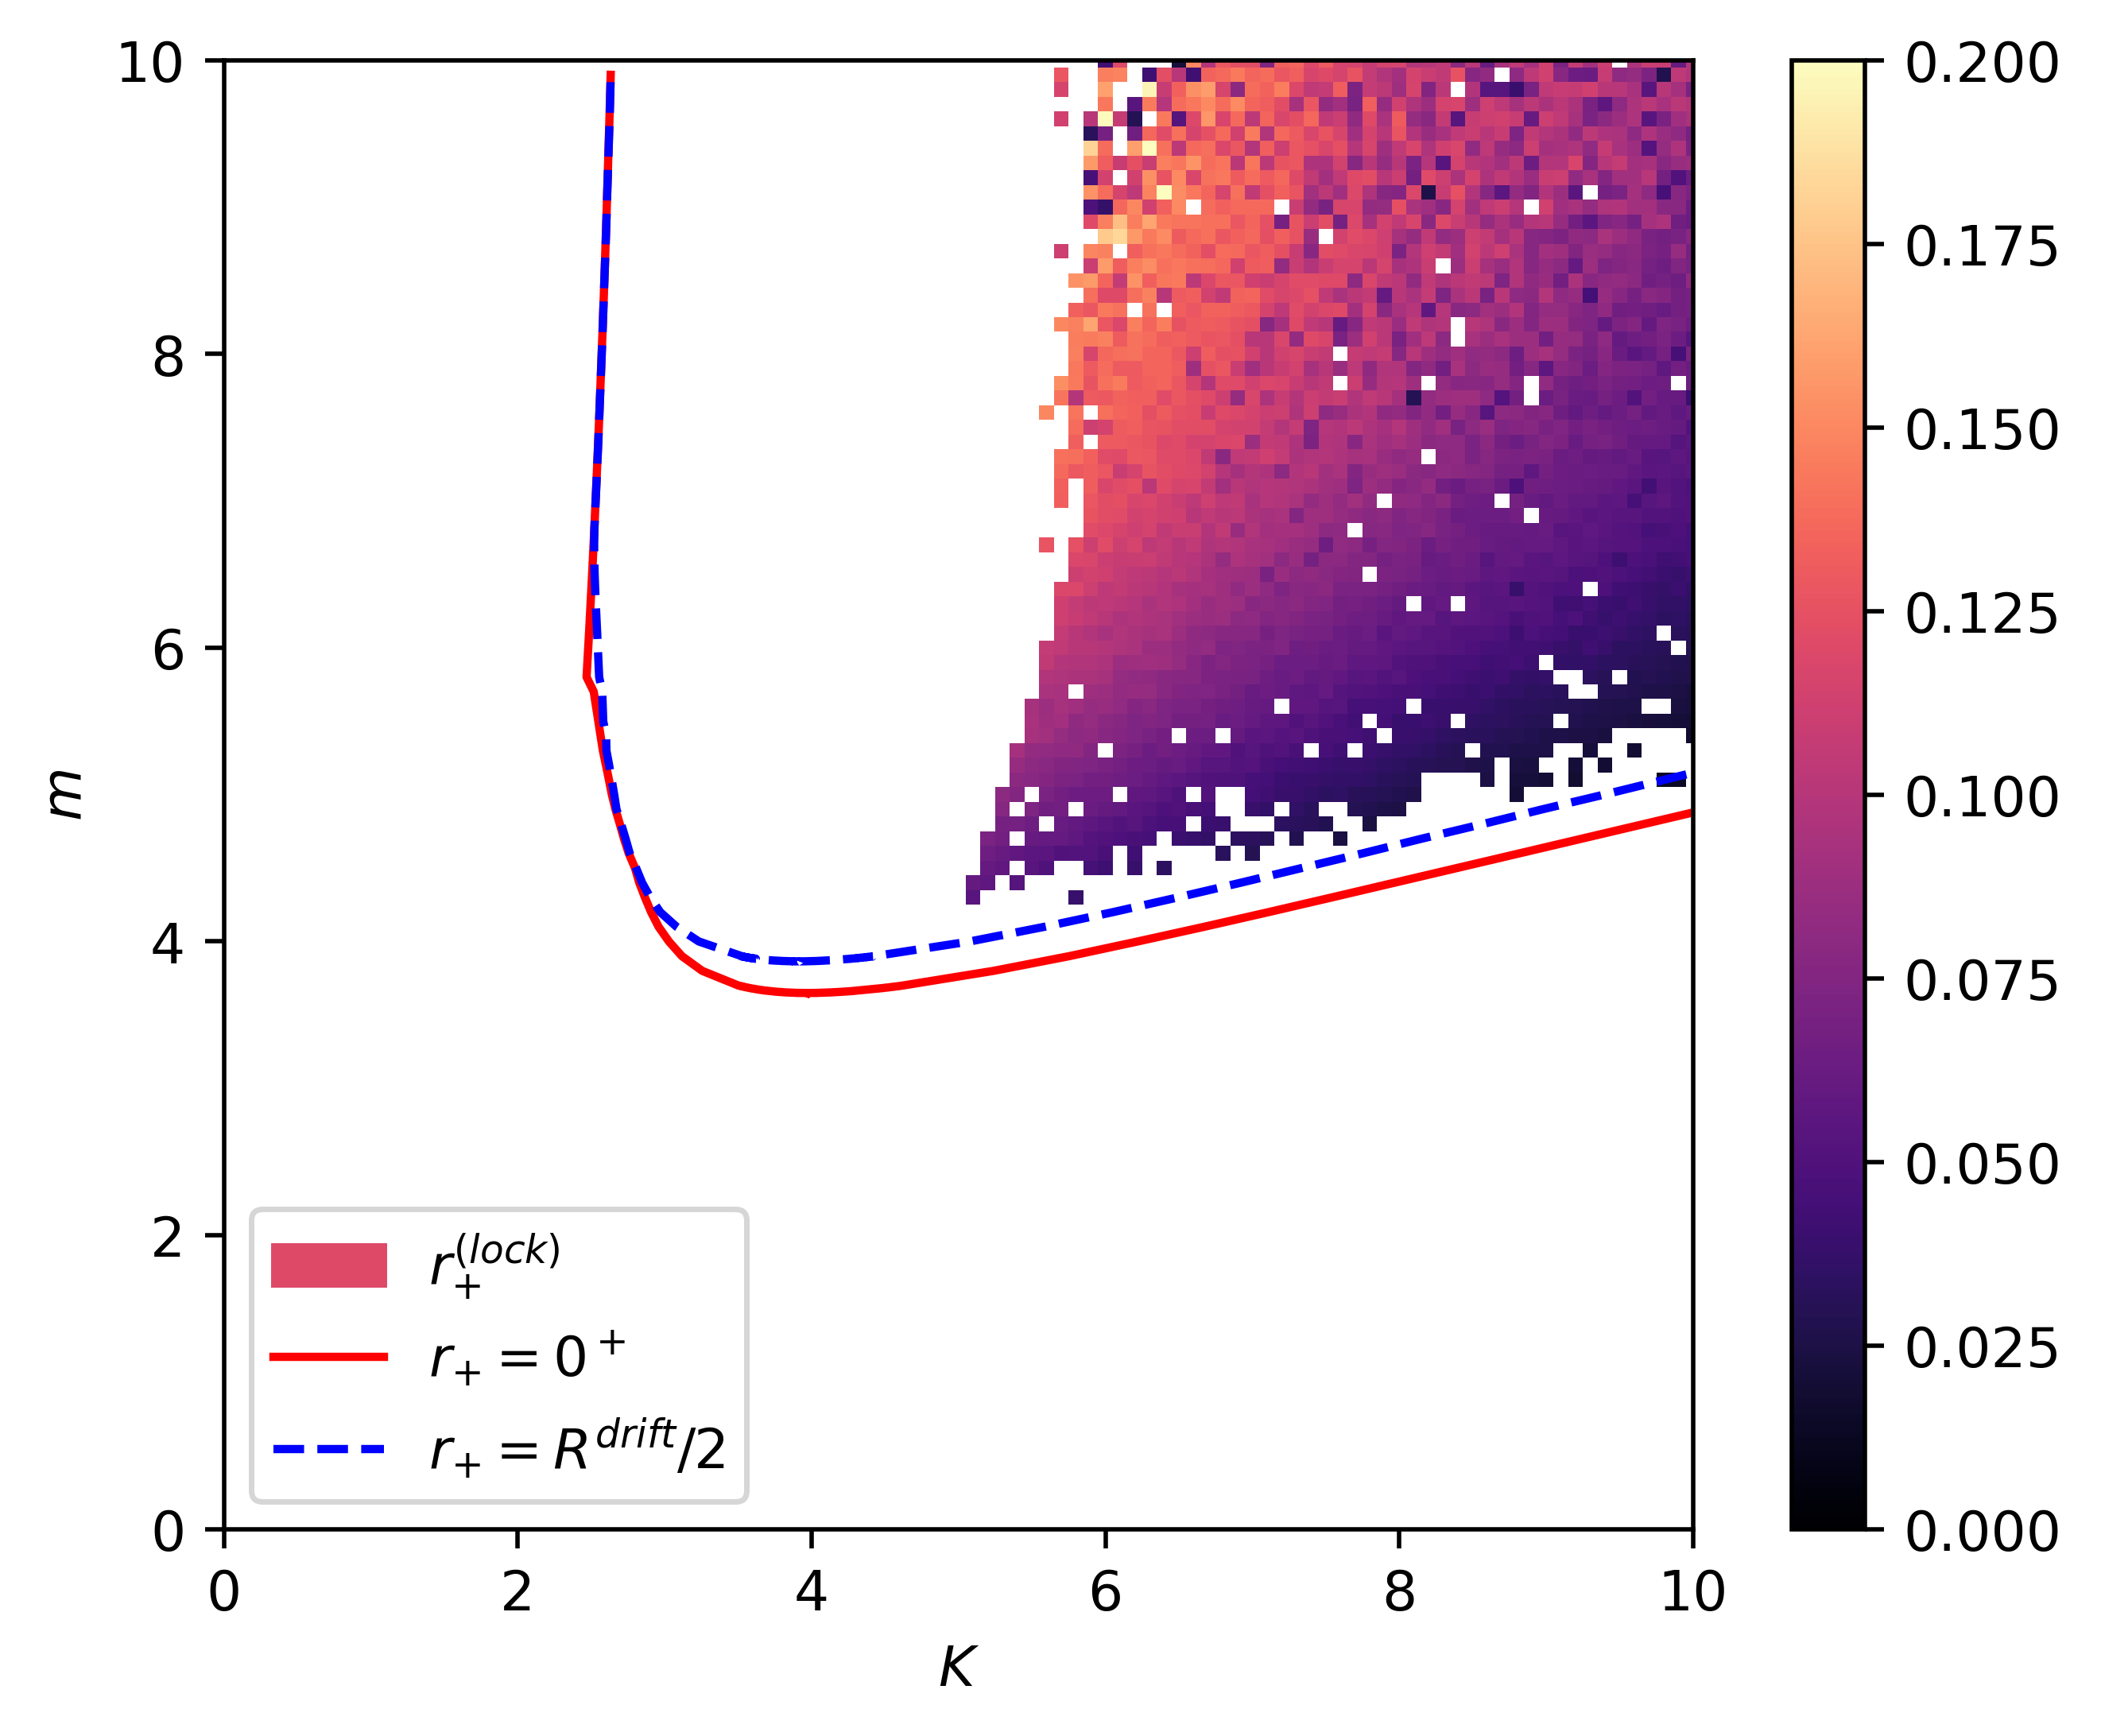

In [172]:
plt.figure(dpi=500)
plt.pcolormesh(KK,MM,NRP,cmap='magma',vmin=0,vmax=0.2)
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}=0^+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}=R^{drift}/2$')
plt.plot(K_rpdhu,ms_rpdh,'b--')
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel(r'$K$')
plt.ylabel(r'$m$')
plt.gca().set_aspect('equal')
cmap = cm.get_cmap('magma')
color_middle = cmap(0.6)  # colormap에서 중간색 선택

patch = mpatches.Patch(color=color_middle, label=r'$r_{+}^{(lock)}$')

# legend에 라인 + patch 같이 넣기
plt.legend(handles=[patch] + plt.gca().get_legend_handles_labels()[0],loc=3)
plt.colorbar()
plt.show()

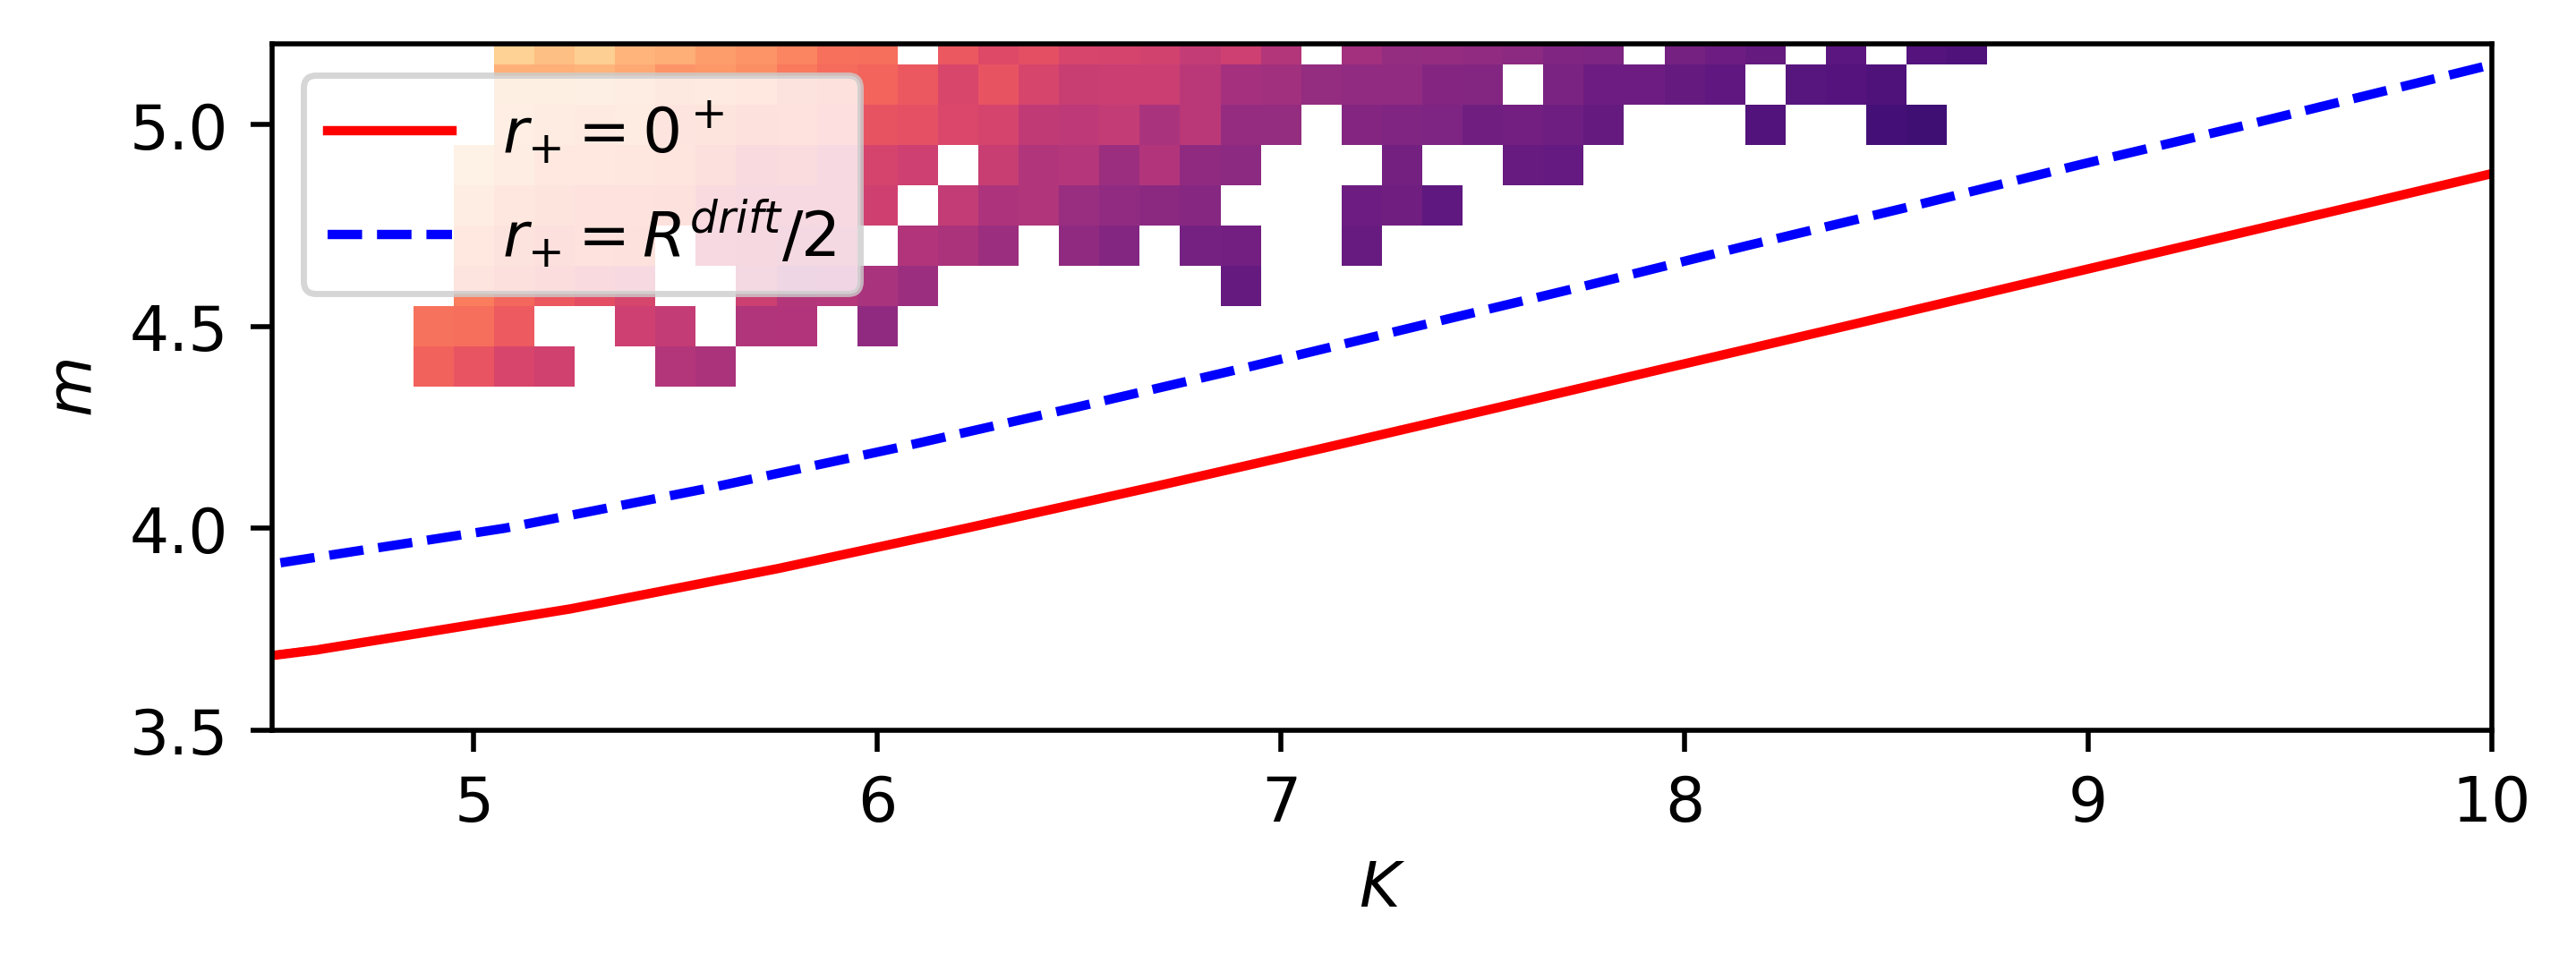

In [153]:
plt.figure(dpi=500)
plt.pcolormesh(KK,MM,NRP,cmap='magma',vmin=0,vmax=0.1)
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}=0^+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}=R^{drift}/2$')
plt.plot(K_rpdhu,ms_rpdh,'b--')
plt.xlim(4.5,10)
plt.ylim(3.5,5.2)
plt.xlabel(r'$K$')
plt.ylabel(r'$m$')
plt.gca().set_aspect('equal')
plt.legend()
# plt.colorbar()
plt.show()

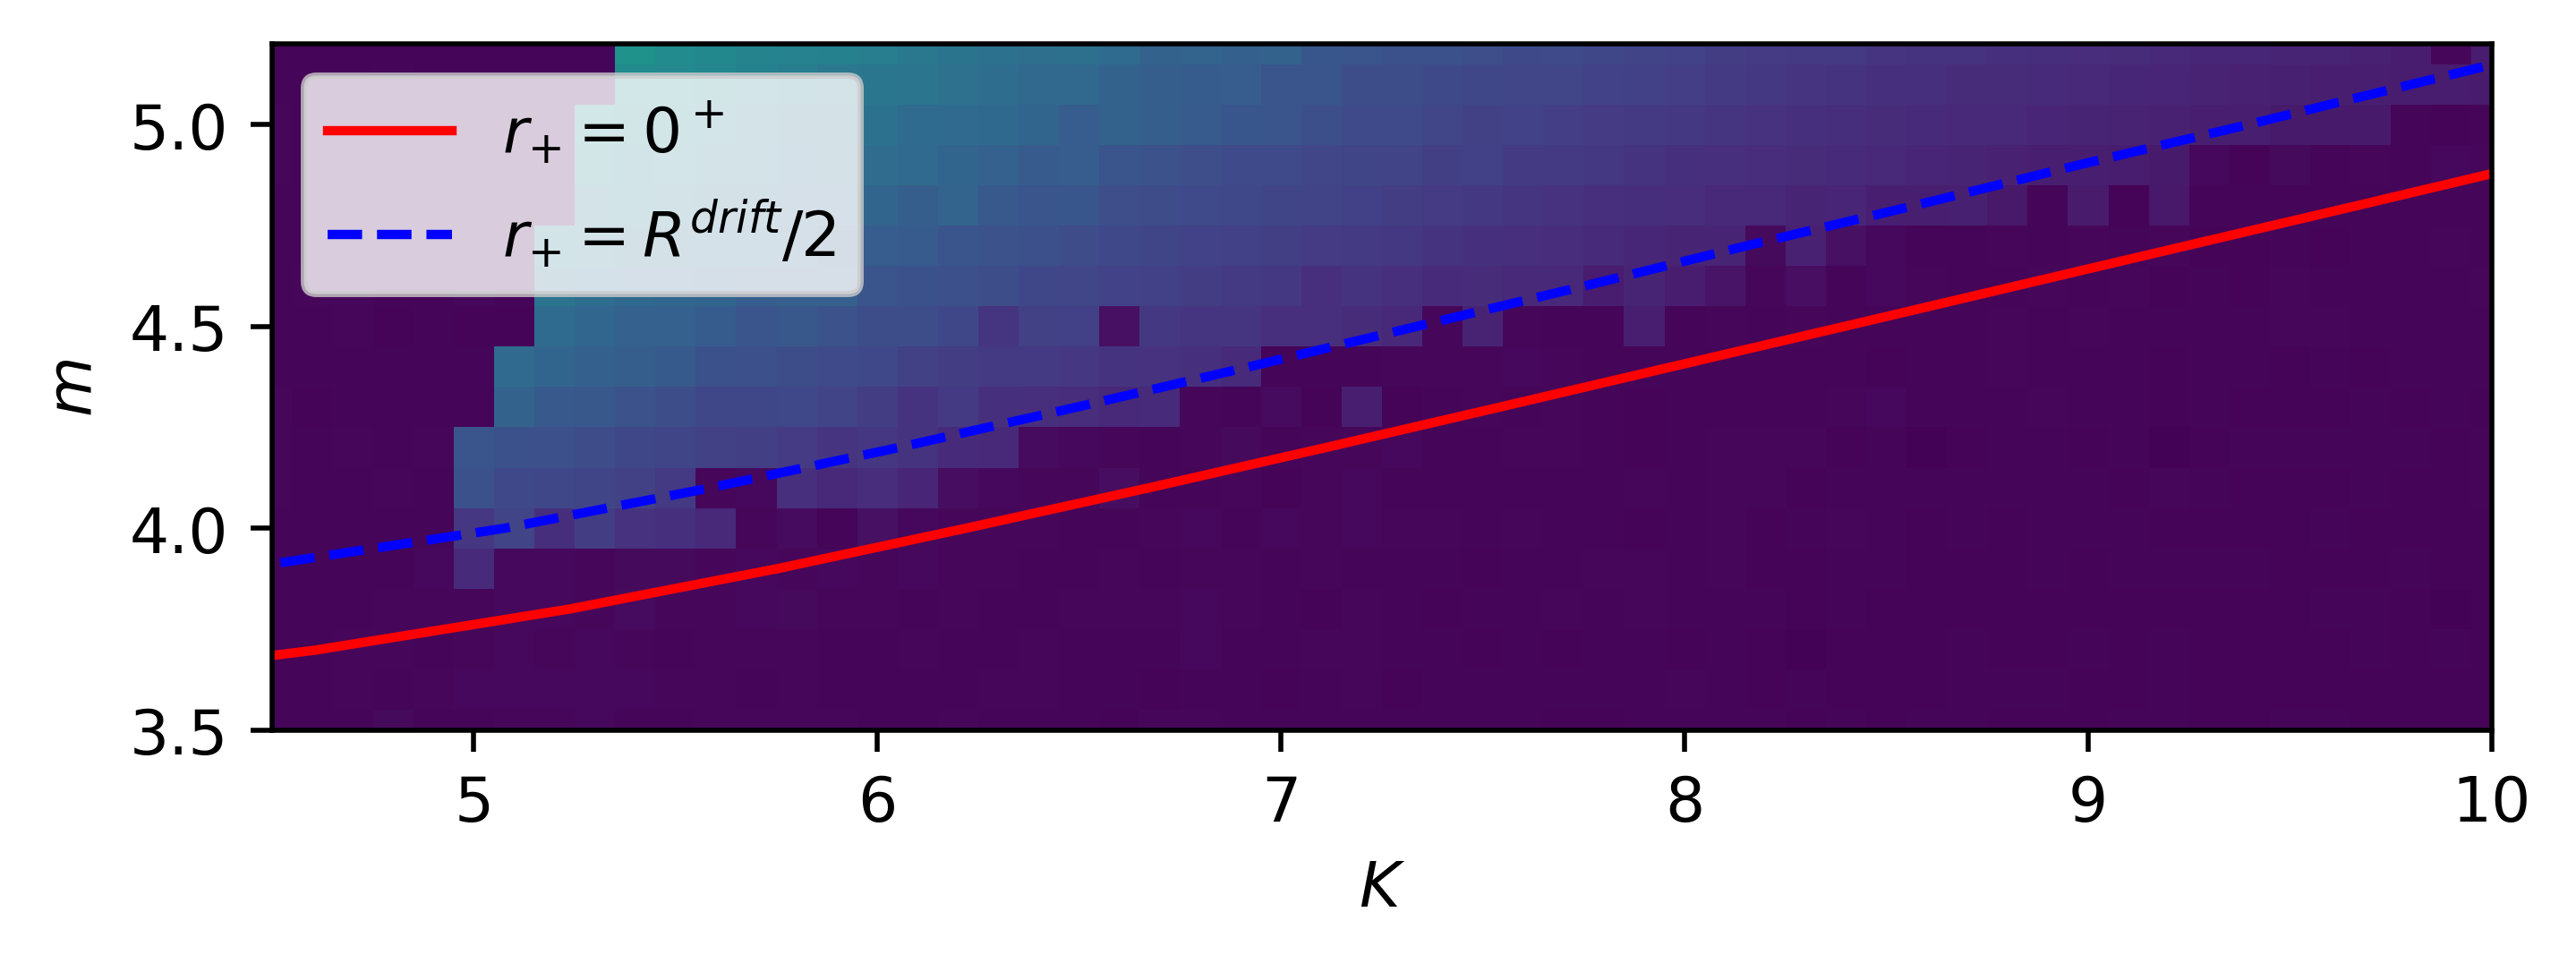

In [142]:
plt.figure(dpi=500)
plt.pcolormesh(KK,MM,NSIG_S)
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}=0^+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}=R^{drift}/2$')
plt.plot(K_rpdhu,ms_rpdh,'b--')
plt.xlim(4.5,10)
plt.ylim(3.5,5.2)
plt.xlabel(r'$K$')
plt.ylabel(r'$m$')
plt.gca().set_aspect('equal')
plt.legend()
# plt.colorbar()
plt.show()

In [177]:
RPl

NameError: name 'RPl' is not defined

Text(0, 0.5, '$r_{+,lock,sim}$')

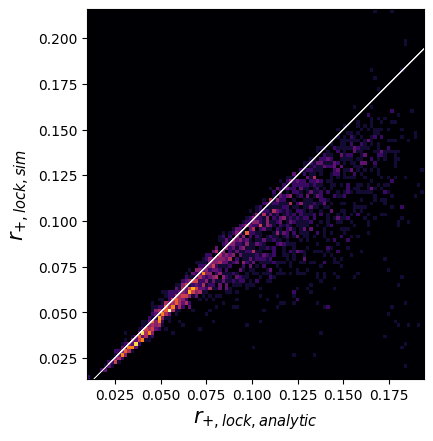

In [179]:
# Filter out NaN values from A_RPU and RP
valid_indices = ~np.isnan(RPl.flatten()) & ~np.isnan(NRP.flatten())
filtered_A_RPU = RPl.flatten()[valid_indices]
filtered_RP = NRP.flatten()[valid_indices]

# Plot the 2D histogram
plt.hist2d(filtered_A_RPU, filtered_RP, bins=100, cmap='inferno')
# Plot the diagonal line
plt.plot(filtered_RP, filtered_RP, lw=0.5, c='w')
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('$r_{+,lock,analytic}$',fontsize=15)
plt.ylabel('$r_{+,lock,sim}$',fontsize=15)

Text(0, 0.5, '$r_{+,lock,sim}$')

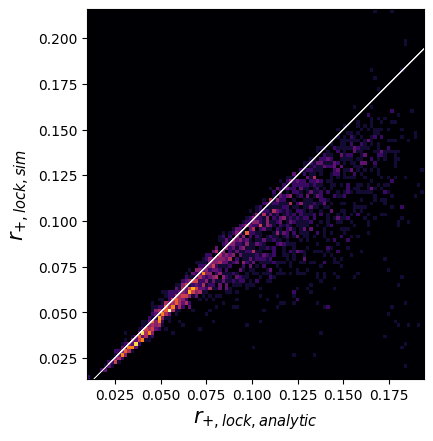

In [195]:
# Filter out NaN values from A_RPU and RP
valid_indices = ~np.isnan(RPl) & ~np.isnan(NRP)
filtered_A_RPU = RPl[valid_indices]
filtered_RP = NRP[valid_indices]

# Plot the 2D histogram
plt.hist2d(filtered_A_RPU, filtered_RP, bins=100, cmap='inferno')
# Plot the diagonal line
plt.plot(filtered_RP, filtered_RP, lw=0.5, c='w')
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('$r_{+,lock,analytic}$',fontsize=15)
plt.ylabel('$r_{+,lock,sim}$',fontsize=15)

Text(0.5, 0, '$\\sigma_{t,analytic}$')

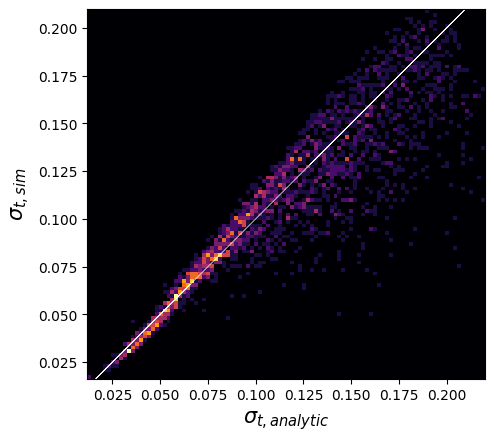

In [196]:
# Filter out NaN values from A_RPU and RP
# valid_indices = ~np.isnan(sig_r) & ~np.isnan(NSIG_S)
filtered_A_RPU = sig_r[valid_indices]
filtered_RP = NSIG_S[valid_indices]

# Plot the 2D histogram
plt.hist2d(filtered_A_RPU, filtered_RP, bins=100, cmap='inferno')
# Plot the diagonal line
plt.plot(filtered_RP, filtered_RP, lw=0.5, c='w')
plt.gca().set_aspect('equal', adjustable='box')

plt.ylabel('$\sigma_{t,sim}$',fontsize=15)
plt.xlabel('$\sigma_{t,analytic}$',fontsize=15)

In [199]:
def nan_corrcoef(a,b):
    a = a.flatten()
    b = b.flatten()
    nan_idx1 = np.isnan(a)
    nan_idx2 = np.isnan(b)
    nan_idx = nan_idx1 | nan_idx2
    a = a[~nan_idx]
    b = b[~nan_idx]
    return np.corrcoef(a,b)[0,1]
nan_corrcoef(sig_r[valid_indices], NSIG_S[valid_indices])

0.9019726793591636

C:\Users\kim9y\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\kim9y\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\kim9y\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kim9y\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact

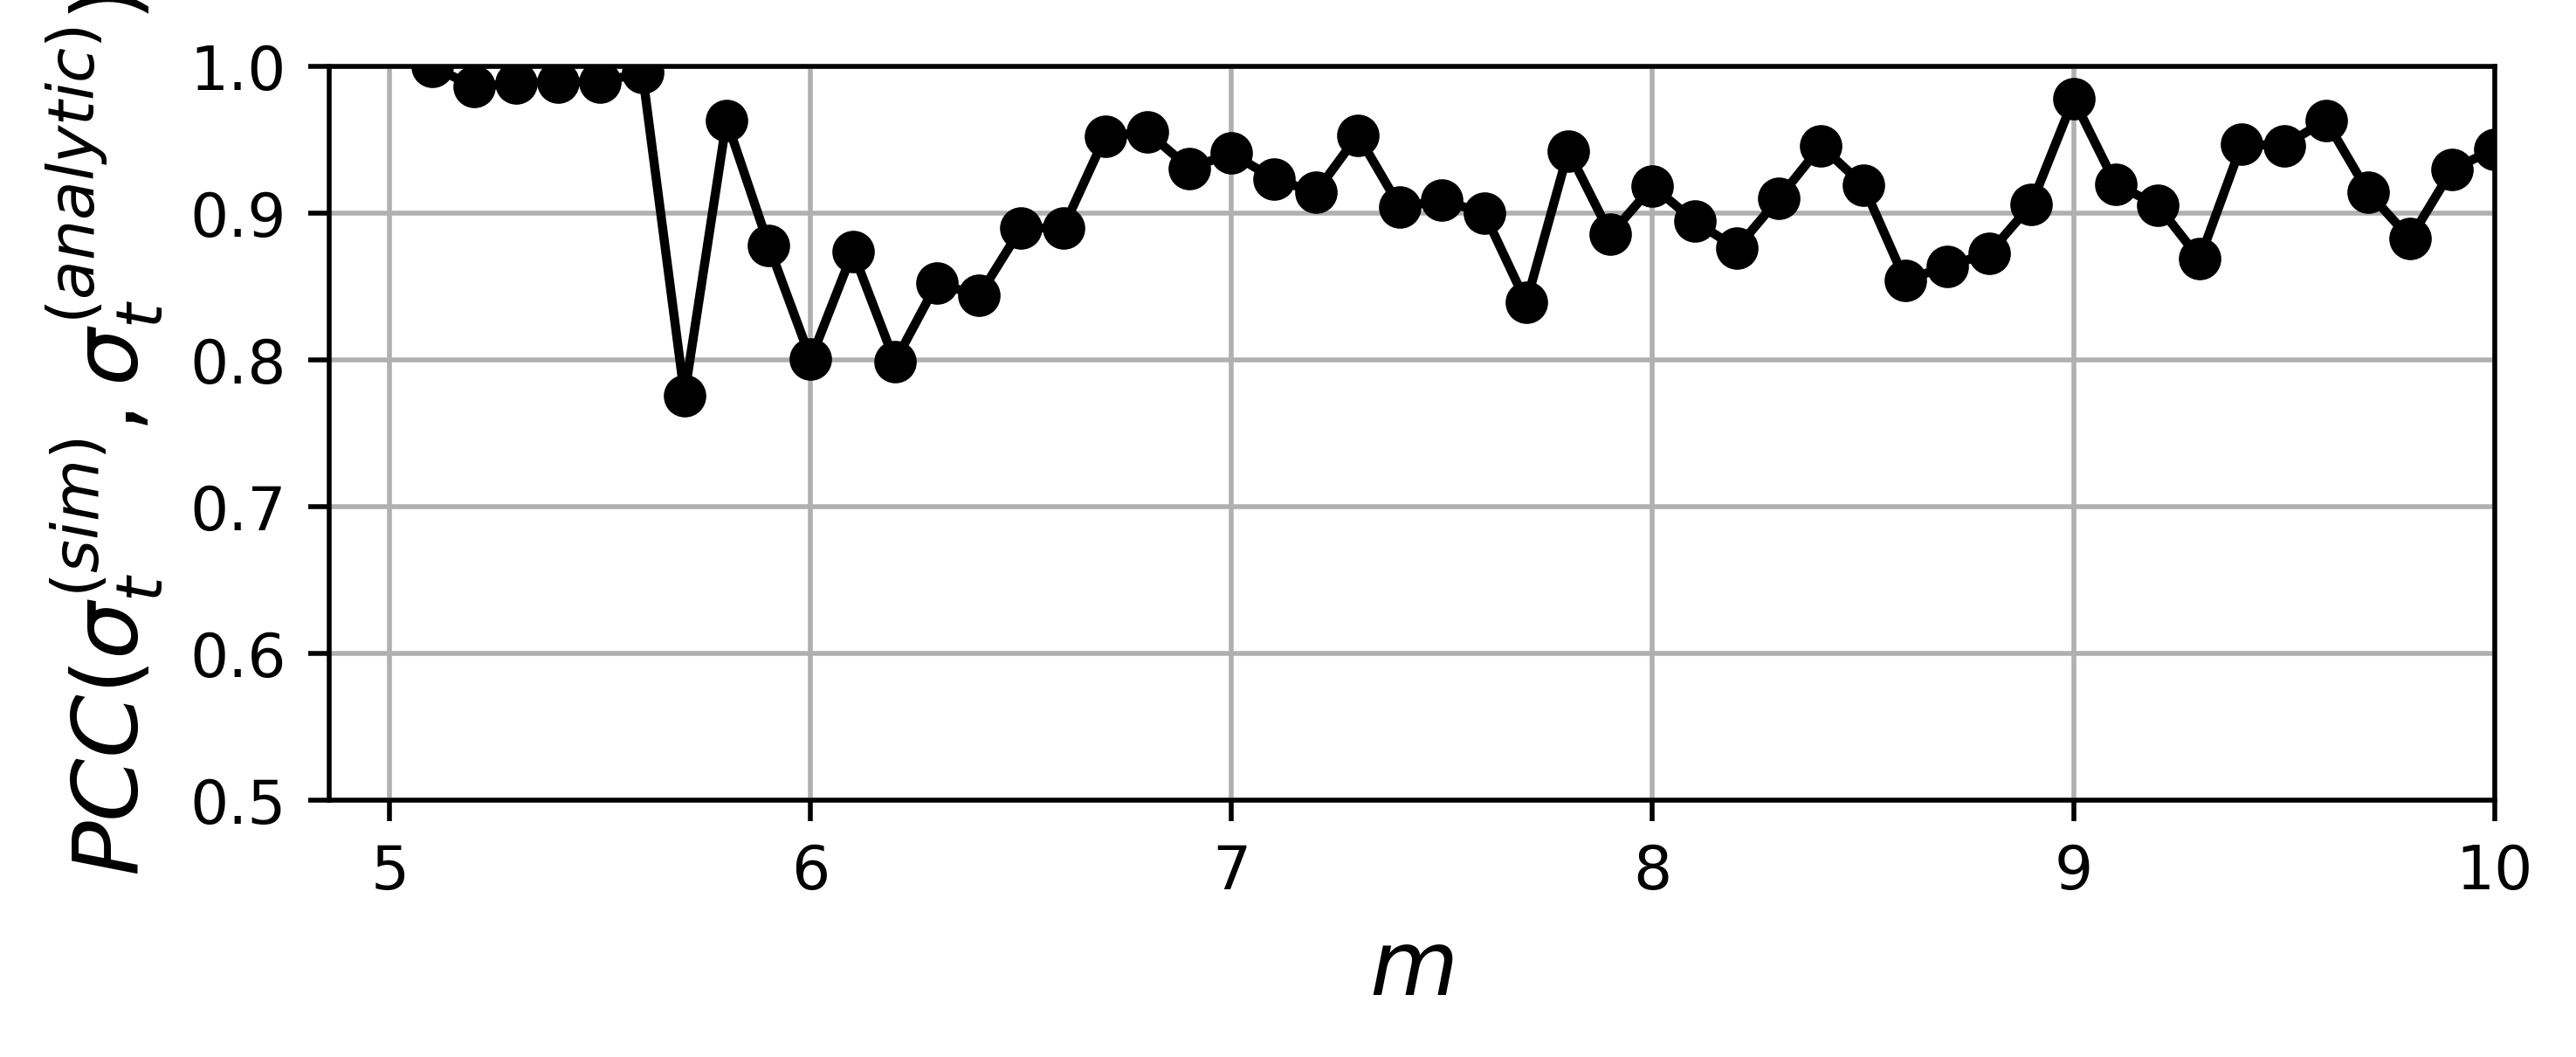

In [213]:
def nan_corrcoef(a,b):
    a = a.flatten()
    b = b.flatten()
    nan_idx1 = np.isnan(a)
    nan_idx2 = np.isnan(b)
    nan_idx = nan_idx1 | nan_idx2
    a = a[~nan_idx]
    b = b[~nan_idx]
    return np.corrcoef(a,b)[0,1]

S = np.where(valid_indices,sig_r,np.nan)
NS = np.where(valid_indices,NSIG_S,np.nan)
c_sigs = []
for i in range(0,101,1):
    c = nan_corrcoef(S[:,i], NS[:,i])
    c_sigs.append(c)
c_sigs = np.array(c_sigs)
plt.figure(dpi=500)
plt.subplot(211)
plt.plot(np.linspace(0,10,101),c_sigs,'ko-')
plt.xlabel('$m$',fontsize=15)
plt.ylabel('$PCC(\sigma_{t}^{(sim)},\sigma_{t}^{(analytic)})$',fontsize=15)
plt.ylim(0.5,1)
plt.xlim(right=10)
plt.grid()
plt.show()